In [1]:
#from thllib import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
#from thllib import util
import figurefirst as fifi
import scipy.signal
import local_project_functions as lpf
from IPython.display import SVG,display
import networkx as nx


import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd
import networkx as nx

In [2]:
%matplotlib inline

In [3]:
flynumbers = list(range(1389,1402))
flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
l = [fly.open_signals() for fly in flylist]

In [4]:
fly_nums = range(1389,1402)#,1545)
multi_fly_df = util.construct_multi_fly_df(fly_nums)

Making dataframe for fly number 1389
Making dataframe for fly number 1390
Making dataframe for fly number 1391
Making dataframe for fly number 1392
Making dataframe for fly number 1393
Making dataframe for fly number 1394
Making dataframe for fly number 1395
Making dataframe for fly number 1396
Making dataframe for fly number 1397
Making dataframe for fly number 1398
Making dataframe for fly number 1399
Making dataframe for fly number 1400
Making dataframe for fly number 1401


In [6]:
sorted_keys = sorted(fly.spikestates.keys())

cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

for cull in cull_list:
    sorted_keys.remove(cull)
#[sorted_keys.remove(cull) for cull in cull_list]

flydict = {}
for fly in flylist:
    flydict[fly.flynum] = fly
    
stim_conditions = [('common', 'idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'),
                  ('common', 'idx', 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'),
                  ('common', 'idx', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0')]

In [7]:
sector_map = {'rb-tu':'cl_blocks, g_x=-1, g_y=4 b_x=8, b_y=0',
                  'nb-tu':'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0',
                  'lb-tu':'cl_blocks, g_x=-1, g_y=4 b_x=-8, b_y=0',

                  'rb-nu':'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0',
                  'nb-nu':'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0',
                  'lb-nu':'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0',

                  'rb-td':'cl_blocks, g_x=-1, g_y=-4 b_x=8, b_y=0',
                  'nb-td':'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0',
                  'lb-td':'cl_blocks, g_x=-1, g_y=-4 b_x=-8, b_y=0'}

In [9]:
print(multi_fly_df.columns.values)
print(np.unique(multi_fly_df['stimulus']))

idx = (multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True')& \
        ((multi_fly_df['amp_diff']>0.1)&(multi_fly_df['amp_diff']<0.104))


['t' 'stimulus' 'amp_diff' 'left_amp' 'right_amp' 'fly_num' 'wbf'
 'experimental_condition' 'pr_left' 'tpd_left' 'nm_left' 'iii1_left'
 'iii3_left' 'i2_left' 'hg2_left' 'hg3_left' 'hg1_left' 'i1_left'
 'bkg_left' 'b1_left' 'b2_left' 'b3_left' 'iii24_left' 'hg4_left'
 'pr_right' 'tpd_right' 'nm_right' 'iii1_right' 'iii3_right' 'i2_right'
 'hg2_right' 'hg3_right' 'hg1_right' 'i1_right' 'bkg_right' 'b1_right'
 'b2_right' 'b3_right' 'iii24_right' 'hg4_right']
['cl_blocks, g_x=-1, g_y=-4 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=-4 b_x=8, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=8, b_y=0'
 'ol_blocks, g_x=-12, g_y=0 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=-4 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=0 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=4 b_x=0, b_y=0'
 '

In [10]:
def plot_sector_kine(flylist,
                sector,ax,
                pathspecs,
                mode = 'hist',
                contours = False,
                rng = (25,95)):
    sector_map = {'rb-tu':'cl_blocks, g_x=-1, g_y=4 b_x=8, b_y=0',
                  'nb-tu':'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0',
                  'lb-tu':'cl_blocks, g_x=-1, g_y=4 b_x=-8, b_y=0',

                  'rb-nu':'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0',
                  'nb-nu':'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0',
                  'lb-nu':'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0',

                  'rb-td':'cl_blocks, g_x=-1, g_y=-4 b_x=8, b_y=0',
                  'nb-td':'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0',
                  'lb-td':'cl_blocks, g_x=-1, g_y=-4 b_x=-8, b_y=0'}

    block_key = sector_map[sector]

    if mode == 'hist':
        group_hist = get_group_hist(flylist,
                                 xkey,
                                 ykey,
                                 block_keys = [block_key],
                                 condition_keys = ['condition=test'])
        sector_mask = np.array([group_hist>0.5]*4)
        ps = pathspecs[sector]
        fc = ps.mplkwargs()['facecolor']
        sector_img = (sector_mask*fc[:,None,None]).T
        ax.imshow(sector_img,interpolation = 'None',extent = (0,1,0,1))
    if mode == 'kde':
        group_hists = get_kde_estimates_kine(flylist,rng = rng,
                                             block_keys = [block_key],
                                 condition_keys = ['condition=test'],
                                 bandwidth = 5,
                                 nbins = 100)
        print np.shape(group_hists)
        group_hists = np.product(group_hists,axis = 0)
        if contours:
            #sector_mask = np.array(group_hists>0.001*4)
            #pad the mask to deal with corners and edges
            sector_mask = group_hists
            padr = np.zeros(np.shape(sector_mask)[1])
            sector_mask = np.vstack((padr,sector_mask,padr))
            padc = np.zeros((np.shape(sector_mask)[0],1)) 
            sector_mask = np.hstack((padc,sector_mask,padc))
            #get the contour
            from skimage import measure
            level = np.percentile(group_hists,90)
            contours = measure.find_contours(sector_mask,level)
            if len(contours) > 1:
                print('more than one contour found')
                contour = contours[np.argmax([len(c) for c in contours])].T
            else:
                contour = contours[0].T
            #put back in data coords
            cy = (contour[0]-1)/(np.shape(sector_mask)[0]-1)
            cx = (contour[1]-1)/(np.shape(sector_mask)[1]-1)
            
            cy =cy*(rng[1]-rng[0]) + rng[0]
            cx =cx*(rng[1]-rng[0]) + rng[0]
            
            if (cy[0] != cy[-1]) | (cx[0] != cx[-1]):
                #close the contours
                cy = np.hstack([cy,cy[0]])
                cx = np.hstack([cx,cx[0]])
            ps = pathspecs[sector]
            kwargs = ps.mplkwargs()
            ax.fill(cx,cy,clip_on = False,**kwargs)
        else:
            sector_mask = np.array([group_hists>0.001]*4)
            ps = pathspecs[sector]
            fc = ps.mplkwargs()['facecolor']
            sector_img = np.transpose(sector_mask*fc[:,None,None],(1,2,0))[::-1,:,:]
            ax.imshow(sector_img,interpolation = 'None',extent = (0,1,0,1))

In [11]:
def plot_sector(flylist,
                xkey,ykey,
                sector,ax,
                pathspecs,
                mode = 'hist',
                contours = False):
    sector_map = {'rb-tu':'cl_blocks, g_x=-1, g_y=4 b_x=8, b_y=0',
                  'nb-tu':'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0',
                  'lb-tu':'cl_blocks, g_x=-1, g_y=4 b_x=-8, b_y=0',
                  
                  'rb-nu':'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0',
                  'nb-nu':'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0',
                  'lb-nu':'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0',
                  
                  'rb-td':'cl_blocks, g_x=-1, g_y=-4 b_x=8, b_y=0',
                  'nb-td':'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0',
                  'lb-td':'cl_blocks, g_x=-1, g_y=-4 b_x=-8, b_y=0'}
    
    block_key = sector_map[sector]
    if mode == 'hist':
        group_hist = get_group_hist(flylist,
                                 xkey,
                                 ykey,
                                 block_keys = [block_key],
                                 condition_keys = ['condition=test'])
        sector_mask = np.array([group_hist>0.5]*4)
        ps = pathspecs[sector]
        fc = ps.mplkwargs()['facecolor']
        sector_img = (sector_mask*fc[:,None,None]).T
        ax.imshow(sector_img,interpolation = 'None',extent = (0,1,0,1))
    if mode == 'kde':
        group_hists = get_kde_estimates(flylist,
                                 xkey,
                                 ykey,
                                 block_keys = [block_key],
                                 condition_keys = ['condition=test'],
                                 bandwidth = 0.1,
                                 nbins = 100)
        group_hists = np.product(group_hists,axis = 0)
        if contours:
            #sector_mask = np.array(group_hists>0.001*4)
            #pad the mask to deal with corners and edges
            sector_mask = group_hists
            padr = np.zeros(np.shape(sector_mask)[1])
            sector_mask = np.vstack((padr,sector_mask,padr))
            padc = np.zeros((np.shape(sector_mask)[0],1)) 
            sector_mask = np.hstack((padc,sector_mask,padc))
            #get the contour
            from skimage import measure
            contours = measure.find_contours(sector_mask,30.5)
            if len(contours) > 1:
                print('more than one contour found for:')
                print('%s %s - %s %s'%(xkey + ykey))
                contour = contours[np.argmax([len(c) for c in contours])].T
            else:
                contour = contours[0].T
            #put back in data coords
            cy = (contour[0]-1)/(np.shape(sector_mask)[0]-1)
            cx = (contour[1]-1)/(np.shape(sector_mask)[1]-1)
            if (cy[0] != cy[-1]) | (cx[0] != cx[-1]):
                #close the contours
                cy = np.hstack([cy,cy[0]])
                cx = np.hstack([cx,cx[0]])
            ps = pathspecs[sector]
            #fc = ps.mplkwargs()['facecolor']
            #ec = ps.mplkwargs()['edgecolor']
            kwargs = ps.mplkwargs()
            ax.fill(cx,cy,clip_on = False,**kwargs)
        else:
            sector_mask = np.array([group_hists>0.001]*4)
            ps = pathspecs[sector]
            fc = ps.mplkwargs()['facecolor']
            sector_img = np.transpose(sector_mask*fc[:,None,None],(1,2,0))[::-1,:,:]
            ax.imshow(sector_img,interpolation = 'None',extent = (0,1,0,1))


In [12]:
def get_kde_estimates(flies,xkey,ykey,
                      condition_keys = [],
                      block_keys = [],
                      nbins = 50,bandwidth = 0.05):
    from sklearn.neighbors.kde import KernelDensity
    pdfs = []
    for fly in flies:
        try:
            dmask = fly.data_mask
            c_masks = []
            b_masks = []

            for ckey in condition_keys:
                c_masks.append(np.array(fly.experimental_condition) == ckey)
            for bkey in block_keys:
                b_masks.append(np.array(fly.experimental_block) == bkey)
            if len(c_masks)>0:
                if len(b_masks)>0:
                    dmask = dmask & np.any(b_masks,axis = 0) & np.any(c_masks,axis = 0)
                else:
                    dmask = dmask & np.any(c_masks,axis = 0)
            else:
                if len(b_masks)>0:
                    dmask = dmask & np.any(b_masks,axis = 0)

            x = fly.non_neg_signals[xkey][dmask]
            y = fly.non_neg_signals[ykey][dmask]
            X = np.array([x,y])
            xedges = np.linspace(0,1,nbins)
            yedges = np.linspace(0,1,nbins)
            gridx,gridy = np.meshgrid(xedges,yedges)
            kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X.T)
            smps = kde.score_samples(np.vstack((gridx.ravel(),gridy.ravel())).T)
            pdfs.append((np.exp(smps.reshape(np.shape(gridx)))))
        except ValueError:
            pass
    return pdfs

In [13]:
def get_kde_estimates_kine(flies,rng = (25,95),
                      condition_keys = [],
                      block_keys = [],
                      nbins = 50,bandwidth = 10):
    from sklearn.neighbors.kde import KernelDensity
    #from thllib import util
    from flylib import util
    pdfs = []
    for fly in flies:
        #try:
        dmask = fly.data_mask
        c_masks = []
        b_masks = []

        for ckey in condition_keys:
            c_masks.append(np.array(fly.experimental_condition) == ckey)
        for bkey in block_keys:
            b_masks.append(np.array(fly.experimental_block) == bkey)
        if len(c_masks)>0:
            if len(b_masks)>0:
                dmask = dmask & np.any(b_masks,axis = 0) & np.any(c_masks,axis = 0)
            else:
                dmask = dmask & np.any(c_masks,axis = 0)
        else:
            if len(b_masks)>0:
                dmask = dmask & np.any(b_masks,axis = 0)

        x = util.fill_nan(np.rad2deg(np.array(fly.left_amp)[dmask]))
        y = util.fill_nan(np.rad2deg(np.array(fly.right_amp)[dmask]))
        X = np.array([x,y])
        X[np.isnan(X)] = 0
        X = np.squeeze(X)
        xedges = np.linspace(rng[0],rng[1],nbins)
        yedges = np.linspace(rng[0],rng[1],nbins)
        gridx,gridy = np.meshgrid(xedges,yedges)
        kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X.T)
        smps = kde.score_samples(np.vstack((gridx.ravel(),gridy.ravel())).T)
        pdfs.append((np.exp(smps.reshape(np.shape(gridx)))))
        #except ValueError:
        #    pass
    return pdfs

In [14]:
def make_scatter_plots(fly,ax_group):
    """create summary plot for each fly in flylist, uses the template 
    file cov_matrix_triang_layout.svg, the hdf5 data of each fly needs to 
    be loaded"""
    import figurefirst as fifi
    if 'data_mask' in fly.h5files.keys():
        #fifi.mpl_functions.kill_all_spines(layout)
        dmask = np.array(fly.data_mask)

        # keymap = {}
        #l = [keymap.update({key:(key_to_key(key[0]),key_to_key(key[1]))}) for key in layout.axes.keys()]
        #keymap.pop('flynum')
        for key1,g in ax_group.items():
            for key2,ax in g.items():
                try:
                    dkeys = (key_to_key(key1),key_to_key(key2))
                    dta1 = fly.non_neg_signals[dkeys[0]][dmask][::50]
                    dta2 = fly.non_neg_signals[dkeys[1]][dmask][::50]
                    ax.scatter(dta1,dta2,
                               marker = 'o', #'.'
                               s = 0.9,
                               color = 'k',
                               alpha = 0.5,
                               edgecolors = 'none',
                               rasterized = True)
                    ax.set_xbound(0,1)
                    ax.set_ybound(0,1)
                    fifi.mpl_functions.kill_spines(ax)
                except KeyError:
                    if key == 'flynum':
                        ax.text(0,0,'Fly%s'%fly.flynum,size = 20)
                    else:
                        pass
            #layout.save('scatter_matrix_%s.svg'%fly.flynum)
            #plt.close('all')
        #display(SVG('scatter_matrix_%s.svg'%fly.flynum))
        
        

In [15]:
def scatter(fly, key1, key2, ax):
            dmask = np.array(fly.data_mask)
            dkeys = (key_to_key(key1),key_to_key(key2))
            dta1 = fly.non_neg_signals[dkeys[0]][dmask][::50]
            dta2 = fly.non_neg_signals[dkeys[1]][dmask][::50]
            ax.scatter(dta1,dta2,
                        marker = 'o', #'.'
                        s = 0.9,
                        color = 'k',
                        alpha = 0.9,
                        edgecolors = 'none',
                        rasterized = True)
            ax.set_xbound(0,1)
            ax.set_ybound(0,1)
            fifi.mpl_functions.kill_spines(ax)
            
'''           
def scatter_left_turn(fly, key1, key2, ax, sector):
    sector_map = {'rb-tu':'cl_blocks, g_x=-1, g_y=4 b_x=8, b_y=0',
                  'nb-tu':'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0',
                  'lb-tu':'cl_blocks, g_x=-1, g_y=4 b_x=-8, b_y=0',

                  'rb-nu':'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0',
                  'nb-nu':'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0',
                  'lb-nu':'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0',

                  'rb-td':'cl_blocks, g_x=-1, g_y=-4 b_x=8, b_y=0',
                  'nb-td':'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0',
                  'lb-td':'cl_blocks, g_x=-1, g_y=-4 b_x=-8, b_y=0'}

    block_key = sector_map[sector]

    if mode == 'hist':
        group_hist = get_group_hist(flylist,
                                 xkey,
                                 ykey,
                                 block_keys = [block_key],
                                 condition_keys = ['condition=test'])
        sector_mask = np.array([group_hist>0.5]*4)
        ps = pathspecs[sector]
        fc = ps.mplkwargs()['facecolor']
        sector_img = (sector_mask*fc[:,None,None]).T
        ax.imshow(sector_img,interpolation = 'None',extent = (0,1,0,1))
            dmask = np.array(fly.data_mask)
            dkeys = (key_to_key(key1),key_to_key(key2))
            dta1 = fly.non_neg_signals[dkeys[0]][dmask][::50]
            dta2 = fly.non_neg_signals[dkeys[1]][dmask][::50]
            ax.scatter(dta1,dta2,
                        marker = 'o', #'.'
                        s = 0.9,
                        color = 'turquoise',
                        alpha = 0.9,
                        edgecolors = 'none',
                        rasterized = True)
            ax.set_xbound(0,1)
            ax.set_ybound(0,1)
            fifi.mpl_functions.kill_spines(ax)
            
def scatter_right_turn(fly, key1, key2, ax):
            dmask = np.array(fly.data_mask)
            dkeys = (key_to_key(key1),key_to_key(key2))
            dta1 = fly.non_neg_signals[dkeys[0]][dmask][::50]
            dta2 = fly.non_neg_signals[dkeys[1]][dmask][::50]
            ax.scatter(dta1,dta2,
                        marker = 'o', #'.'
                        s = 0.9,
                        color = 'r',
                        alpha = 0.9,
                        edgecolors = 'none',
                        rasterized = True)
            ax.set_xbound(0,1)
            ax.set_ybound(0,1)
            fifi.mpl_functions.kill_spines(ax)
'''

"           \ndef scatter_left_turn(fly, key1, key2, ax, sector):\n    sector_map = {'rb-tu':'cl_blocks, g_x=-1, g_y=4 b_x=8, b_y=0',\n                  'nb-tu':'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0',\n                  'lb-tu':'cl_blocks, g_x=-1, g_y=4 b_x=-8, b_y=0',\n\n                  'rb-nu':'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0',\n                  'nb-nu':'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0',\n                  'lb-nu':'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0',\n\n                  'rb-td':'cl_blocks, g_x=-1, g_y=-4 b_x=8, b_y=0',\n                  'nb-td':'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0',\n                  'lb-td':'cl_blocks, g_x=-1, g_y=-4 b_x=-8, b_y=0'}\n\n    block_key = sector_map[sector]\n\n    if mode == 'hist':\n        group_hist = get_group_hist(flylist,\n                                 xkey,\n                                 ykey,\n                                 block_keys = [block_key],\n                                 condition_keys = ['condition

In [16]:
def key_to_key(inkey):
    """map the input key from the cov_mtrx_triang_layout.svg into a set of keys 
    (a tuple of tuples) that can be used to construct signals from the fly data"""
    try:
        k1 = {'R':'right','L':'left'}[inkey[0]]
    except KeyError:
        if inkey[0] == 'w':
            return ('common','wb_freq')
        else:
            return
    k2 = inkey[1:]
    return (k1,k2)

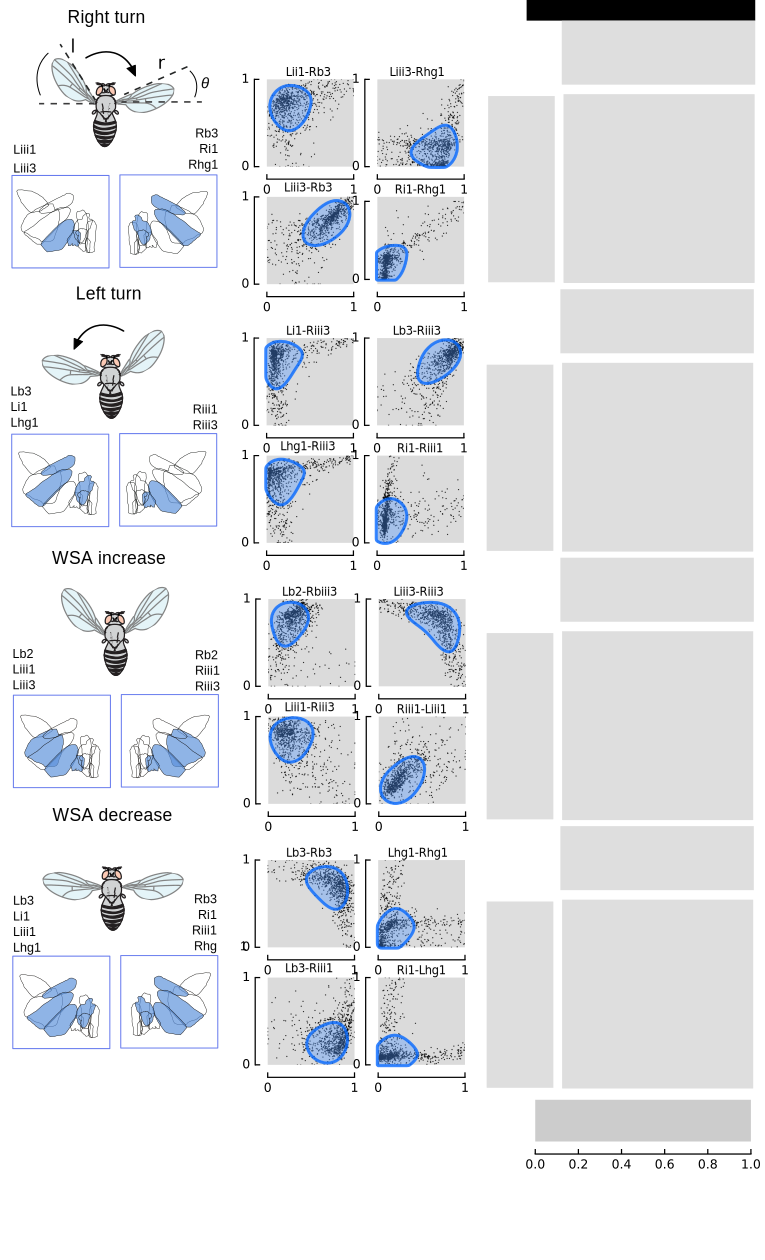

In [17]:
#lpf.make_scatter_plots(flylist[6])#,layout.axes_groups)

#layout = fifi.FigureLayout('layouts/scatter_anc_contour_layout.svg',make_mplfigures = True)
layout = fifi.FigureLayout('layouts/paper_figure_4_v3.svg',make_mplfigures = True)




c_l = layout.pathspecs['lb-nu'].mplkwargs()['edgecolor']
c_r = layout.pathspecs['rb-nu'].mplkwargs()['edgecolor']


#make_scatter_plots(flylist[6],layout.axes_groups['none']['scatter_mtrx'])



ax2 = layout.axes['Lb3_Rb3']
scatter(flylist[6], ('Lb3'),('Rb3'), ax2)
plot_sector(flylist,('left','b3'),('right','b3'),'nb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
ax2.set_xbound(0,1),ax2.set_ybound(0,1)#,ax2.set_xlabel('left b3',color = c_l),ax2.set_ylabel('right b3',color = c_r)
ax2.set_xticks([0,1])
ax2.set_yticks([0,1])


ax3 = layout.axes['Liii1_Rb3']
scatter(flylist[6], ('Liii1'),('Rb3'), ax3)
plot_sector(flylist,('left','iii1'),('right','b3'),'nb-nu',ax3,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
ax3.set_xbound(0,1),ax3.set_ybound(0,1)#,ax3.set_xlabel('left b3',color = c_l),ax3.set_ylabel('right b3',color = c_r)
ax3.set_xticks([0,1])
ax3.set_yticks([0,1])

ax4 = layout.axes['Liii3_Rhg1']
scatter(flylist[6], ('Liii3'),('Rhg1'), ax4)
plot_sector(flylist,('left','iii3'),('right','hg1'),'nb-nu',ax4,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
ax4.set_xbound(0,1),ax4.set_ybound(0,1)#,ax4.set_xlabel('left b3',color = c_l),ax4.set_ylabel('right b3',color = c_r)
ax4.set_xticks([0,1])
ax4.set_yticks([0,1])

ax5 = layout.axes['Liii3_Rb3']
scatter(flylist[6], ('Liii3'),('Rb3'), ax5)
plot_sector(flylist,('left','iii3'),('right','b3'),'nb-nu',ax5,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
ax5.set_xbound(0,1),ax5.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax5.set_ylabel('right b3',color = c_r)
ax5.set_xticks([0,1])
ax5.set_yticks([0,1])

ax6 = layout.axes['Ri1_Rhg1']
scatter(flylist[6], ('Ri1'),('Rhg1'), ax6)
plot_sector(flylist,('right','i1'),('right','hg1'),'nb-nu',ax6,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
ax6.set_xbound(0,1),ax5.set_ybound(0,1)#,ax6.set_xlabel('left b3',color = c_l),ax6.set_ylabel('right b3',color = c_r)
ax6.set_xticks([0,1])
ax6.set_yticks([0,1])

ax7 = layout.axes['Li1_Riii3']
scatter(flylist[6], ('Li1'),('Riii3'), ax7)
plot_sector(flylist,('left','i1'),('right','iii3'),'nb-nu',ax7,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
ax7.set_xbound(0,1),ax7.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax7.set_xticks([0,1])
ax7.set_yticks([0,1])

ax8 = layout.axes['Lb3_Riii3']
scatter(flylist[6], ('Lb3'),('Riii3'), ax8)
plot_sector(flylist,('left','b3'),('right','iii3'),'nb-nu',ax8,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
ax8.set_xbound(0,1),ax8.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax8.set_xticks([0,1])
ax8.set_yticks([0,1])


ax9 = layout.axes['Lhg1_Riii3']
scatter(flylist[6], ('Lhg1'),('Riii3'), ax9)
plot_sector(flylist,('left','hg1'),('right','iii3'),'nb-nu',ax9,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
ax9.set_xbound(0,1),ax9.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax9.set_xticks([0,1])
ax9.set_yticks([0,1])

ax10 = layout.axes['Ri1_Riii1']
scatter(flylist[6], ('Ri1'),('Riii1'), ax10)
plot_sector(flylist,('right','i1'),('right','iii1'),'nb-nu',ax10,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
ax10.set_xbound(0,1),ax10.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax10.set_xticks([0,1])
ax10.set_yticks([0,1])


ax11 = layout.axes['Lb2_Riii3']
scatter(flylist[6], ('Lb2'),('Riii3'), ax11)
plot_sector(flylist,('left','b2'),('right','iii3'),'nb-nu',ax11,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
ax11.set_xbound(0,1),ax11.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax11.set_xticks([0,1])
ax11.set_yticks([0,1])

ax12 = layout.axes['Liii3_Riii3']
scatter(flylist[6], ('Liii3'),('Riii3'), ax12)
plot_sector(flylist,('left','iii3'),('right','iii3'),'nb-nu',ax12,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
ax12.set_xbound(0,1),ax12.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax12.set_xticks([0,1])
ax12.set_yticks([0,1])

ax13 = layout.axes['Liii1_Riii3']
scatter(flylist[6], ('Liii1'),('Riii3'), ax13)
plot_sector(flylist,('left','iii1'),('right','iii3'),'nb-nu',ax13,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
ax13.set_xbound(0,1),ax13.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax13.set_xticks([0,1])
ax13.set_yticks([0,1])

ax14 = layout.axes['Liii1_Riii1']
scatter(flylist[6], ('Liii1'),('Riii1'), ax14)
plot_sector(flylist,('left','iii1'),('right','iii1'),'nb-nu',ax14,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
ax14.set_xbound(0,1),ax14.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax14.set_xticks([0,1])
ax14.set_yticks([0,1])


ax15 = layout.axes['Lhg1_Rhg1']
scatter(flylist[6], ('Lhg1'),('Rhg1'), ax15)
plot_sector(flylist,('left','hg1'),('right','hg1'),'nb-nu',ax15,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
ax15.set_xbound(0,1),ax15.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax15.set_xticks([0,1])
ax15.set_yticks([0,1])

ax16 = layout.axes['Lb3_Riii1']
scatter(flylist[6], ('Lb3'),('Riii1'), ax16)
plot_sector(flylist,('left','b3'),('right','iii1'),'nb-nu',ax16,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
ax16.set_xbound(0,1),ax16.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax16.set_xticks([0,1])
ax16.set_yticks([0,1])

ax17 = layout.axes['Lhg1_Ri1']
scatter(flylist[6], ('Lhg1'),('Ri1'), ax17)
plot_sector(flylist,('left','hg1'),('right','i1'),'nb-nu',ax17,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
ax17.set_xbound(0,1),ax17.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax17.set_xticks([0,1])
ax17.set_yticks([0,1])





'''
ax3 = layout.axes_groups['none']['expanded_inset']['Liii3_Riii3']
plot_sector(flylist,('left','iii3'),('right','iii3'),'nb-nu',ax3,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','iii3'),('right','iii3'),'rb-nu',ax3,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','iii3'),('right','iii3'),'lb-nu',ax3,layout.pathspecs,mode = 'kde',contours = True)
ax3.set_xbound(0,1),ax3.set_ybound(0,1),ax3.set_xlabel('left iii3',color = c_l),ax3.set_ylabel('right iii3',color = c_r)

ax4 = layout.axes_groups['none']['expanded_inset']['Lb3_Riii3']
plot_sector(flylist,('left','b3'),('right','iii3'),'nb-nu',ax4,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','iii3'),'rb-nu',ax4,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','iii3'),'lb-nu',ax4,layout.pathspecs,mode = 'kde',contours = True)
ax4.set_xbound(0,1),ax4.set_ybound(0,1),ax4.set_xlabel('left b3',color = c_l),ax4.set_ylabel('right iii3',color = c_r)

ax5 = layout.axes_groups['none']['expanded_inset']['Ri1_Lhg1']
plot_sector(flylist,('left','hg1'),('right','i1'),'nb-nu',ax5,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','hg1'),('right','i1'),'rb-nu',ax5,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','hg1'),('right','i1'),'lb-nu',ax5,layout.pathspecs,mode = 'kde',contours = True)
ax5.set_xbound(0,1),ax5.set_ybound(0,1),ax5.set_xlabel('left hg1',color = c_l),ax5.set_ylabel('right i1',color = c_r)
'''

fifi.mpl_functions.set_spines(layout)
layout.save('figure_05.svg')
plt.close('all')
display(SVG('figure_05.svg'))

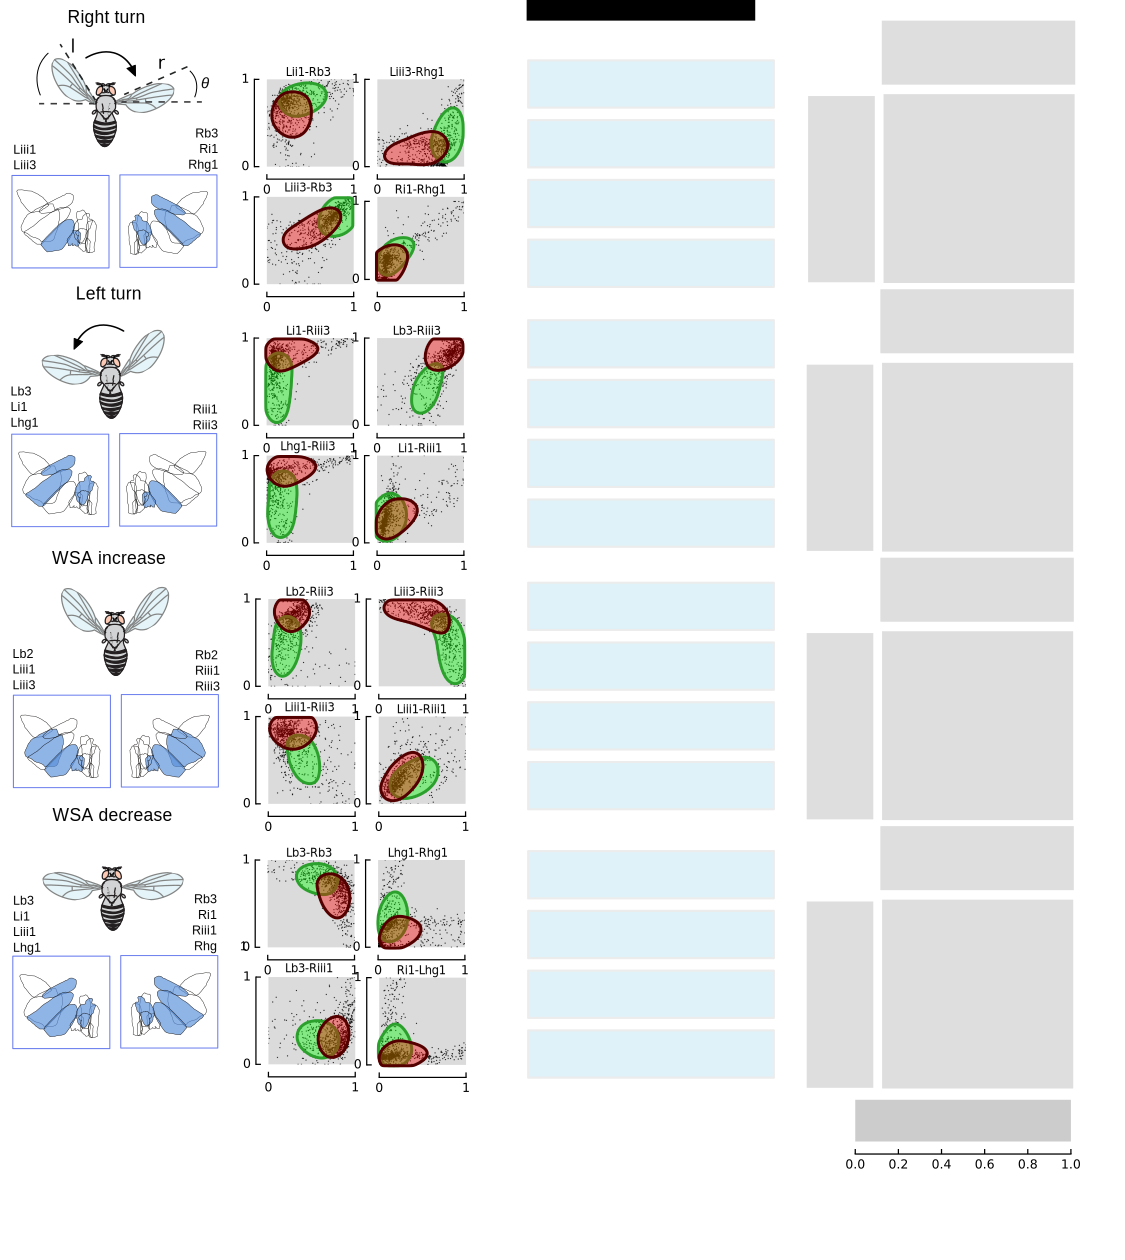

In [22]:
#lpf.make_scatter_plots(flylist[6])#,layout.axes_groups)

#layout = fifi.FigureLayout('layouts/scatter_anc_contour_layout.svg',make_mplfigures = True)
layout = fifi.FigureLayout('layouts/paper_figure_4_v5.svg',make_mplfigures = True)




c_l = layout.pathspecs['lb-nu'].mplkwargs()['edgecolor']
c_r = layout.pathspecs['rb-nu'].mplkwargs()['edgecolor']


#make_scatter_plots(flylist[6],layout.axes_groups['none']['scatter_mtrx'])



ax2 = layout.axes['Lb3_Rb3']
scatter(flylist[6], ('Lb3'),('Rb3'), ax2)
#plot_sector(flylist,('left','b3'),('right','b3'),'nb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
ax2.set_xbound(0,1),ax2.set_ybound(0,1)#,ax2.set_xlabel('left b3',color = c_l),ax2.set_ylabel('right b3',color = c_r)
ax2.set_xticks([0,1])
ax2.set_yticks([0,1])


ax3 = layout.axes['Liii1_Rb3']
scatter(flylist[6], ('Liii1'),('Rb3'), ax3)
#plot_sector(flylist,('left','iii1'),('right','b3'),'nb-nu',ax3,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','iii1'),('right','b3'),'rb-nu',ax3,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','iii1'),('right','b3'),'lb-nu',ax3,layout.pathspecs,mode = 'kde',contours = True)
ax3.set_xbound(0,1),ax3.set_ybound(0,1)#,ax3.set_xlabel('left b3',color = c_l),ax3.set_ylabel('right b3',color = c_r)
ax3.set_xticks([0,1])
ax3.set_yticks([0,1])

ax4 = layout.axes['Liii3_Rhg1']
scatter(flylist[6], ('Liii3'),('Rhg1'), ax4)
#plot_sector(flylist,('left','iii3'),('right','hg1'),'nb-nu',ax4,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','iii3'),('right','hg1'),'rb-nu',ax4,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','iii3'),('right','hg1'),'lb-nu',ax4,layout.pathspecs,mode = 'kde',contours = True)
ax4.set_xbound(0,1),ax4.set_ybound(0,1)#,ax4.set_xlabel('left b3',color = c_l),ax4.set_ylabel('right b3',color = c_r)
ax4.set_xticks([0,1])
ax4.set_yticks([0,1])

ax5 = layout.axes['Liii3_Rb3']
scatter(flylist[6], ('Liii3'),('Rb3'), ax5)
#plot_sector(flylist,('left','iii3'),('right','b3'),'nb-nu',ax5,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','iii3'),('right','b3'),'rb-nu',ax5,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','iii3'),('right','b3'),'lb-nu',ax5,layout.pathspecs,mode = 'kde',contours = True)
ax5.set_xbound(0,1),ax5.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax5.set_ylabel('right b3',color = c_r)
ax5.set_xticks([0,1])
ax5.set_yticks([0,1])

ax6 = layout.axes['Ri1_Rhg1']
scatter(flylist[6], ('Ri1'),('Rhg1'), ax6)
#plot_sector(flylist,('right','i1'),('right','hg1'),'nb-nu',ax6,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('right','i1'),('right','hg1'),'rb-nu',ax6,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('right','i1'),('right','hg1'),'lb-nu',ax6,layout.pathspecs,mode = 'kde',contours = True)
ax6.set_xbound(0,1),ax5.set_ybound(0,1)#,ax6.set_xlabel('left b3',color = c_l),ax6.set_ylabel('right b3',color = c_r)
ax6.set_xticks([0,1])
ax6.set_yticks([0,1])

ax7 = layout.axes['Li1_Riii3']
scatter(flylist[6], ('Li1'),('Riii3'), ax7)
#plot_sector(flylist,('left','i1'),('right','iii3'),'nb-nu',ax7,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','i1'),('right','iii3'),'rb-nu',ax7,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','i1'),('right','iii3'),'lb-nu',ax7,layout.pathspecs,mode = 'kde',contours = True)
ax7.set_xbound(0,1),ax7.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax7.set_xticks([0,1])
ax7.set_yticks([0,1])

ax8 = layout.axes['Lb3_Riii3']
scatter(flylist[6], ('Lb3'),('Riii3'), ax8)
#plot_sector(flylist,('left','b3'),('right','iii3'),'nb-nu',ax8,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','b3'),('right','iii3'),'rb-nu',ax8,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','b3'),('right','iii3'),'lb-nu',ax8,layout.pathspecs,mode = 'kde',contours = True)
ax8.set_xbound(0,1),ax8.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax8.set_xticks([0,1])
ax8.set_yticks([0,1])


ax9 = layout.axes['Lhg1_Riii3']
scatter(flylist[6], ('Lhg1'),('Riii3'), ax9)
#plot_sector(flylist,('left','hg1'),('right','iii3'),'nb-nu',ax9,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','hg1'),('right','iii3'),'rb-nu',ax9,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','hg1'),('right','iii3'),'lb-nu',ax9,layout.pathspecs,mode = 'kde',contours = True)
ax9.set_xbound(0,1),ax9.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax9.set_xticks([0,1])
ax9.set_yticks([0,1])

ax10 = layout.axes['Li1_Riii1']
scatter(flylist[6], ('Li1'),('Riii1'), ax10)
#plot_sector(flylist,('right','i1'),('right','iii1'),'nb-nu',ax10,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','i1'),('right','iii1'),'rb-nu',ax10,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','i1'),('right','iii1'),'lb-nu',ax10,layout.pathspecs,mode = 'kde',contours = True)
ax10.set_xbound(0,1),ax10.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax10.set_xticks([0,1])
ax10.set_yticks([0,1])


ax11 = layout.axes['Lb2_Riii3']
scatter(flylist[6], ('Lb2'),('Riii3'), ax11)
#plot_sector(flylist,('left','b2'),('right','iii3'),'nb-nu',ax11,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','b2'),('right','iii3'),'rb-nu',ax11,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','b2'),('right','iii3'),'lb-nu',ax11,layout.pathspecs,mode = 'kde',contours = True)
ax11.set_xbound(0,1),ax11.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax11.set_xticks([0,1])
ax11.set_yticks([0,1])

ax12 = layout.axes['Liii3_Riii3']
scatter(flylist[6], ('Liii3'),('Riii3'), ax12)
#plot_sector(flylist,('left','iii3'),('right','iii3'),'nb-nu',ax12,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','iii3'),('right','iii3'),'rb-nu',ax12,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','iii3'),('right','iii3'),'lb-nu',ax12,layout.pathspecs,mode = 'kde',contours = True)
ax12.set_xbound(0,1),ax12.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax12.set_xticks([0,1])
ax12.set_yticks([0,1])

ax13 = layout.axes['Liii1_Riii3']
scatter(flylist[6], ('Liii1'),('Riii3'), ax13)
#plot_sector(flylist,('left','iii1'),('right','iii3'),'nb-nu',ax13,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','iii1'),('right','iii3'),'rb-nu',ax13,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','iii1'),('right','iii3'),'lb-nu',ax13,layout.pathspecs,mode = 'kde',contours = True)
ax13.set_xbound(0,1),ax13.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax13.set_xticks([0,1])
ax13.set_yticks([0,1])

ax14 = layout.axes['Liii1_Riii1']
scatter(flylist[6], ('Liii1'),('Riii1'), ax14)
#plot_sector(flylist,('left','iii1'),('right','iii1'),'nb-nu',ax14,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','iii1'),('right','iii1'),'rb-nu',ax14,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','iii1'),('right','iii1'),'lb-nu',ax14,layout.pathspecs,mode = 'kde',contours = True)
ax14.set_xbound(0,1),ax14.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax14.set_xticks([0,1])
ax14.set_yticks([0,1])


ax15 = layout.axes['Lhg1_Rhg1']
scatter(flylist[6], ('Lhg1'),('Rhg1'), ax15)
#plot_sector(flylist,('left','hg1'),('right','hg1'),'nb-nu',ax15,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','hg1'),('right','hg1'),'rb-nu',ax15,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','hg1'),('right','hg1'),'lb-nu',ax15,layout.pathspecs,mode = 'kde',contours = True)
ax15.set_xbound(0,1),ax15.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax15.set_xticks([0,1])
ax15.set_yticks([0,1])

ax16 = layout.axes['Lb3_Riii1']
scatter(flylist[6], ('Lb3'),('Riii1'), ax16)
#plot_sector(flylist,('left','b3'),('right','iii1'),'nb-nu',ax16,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','b3'),('right','iii1'),'rb-nu',ax16,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','b3'),('right','iii1'),'lb-nu',ax16,layout.pathspecs,mode = 'kde',contours = True)
ax16.set_xbound(0,1),ax16.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax16.set_xticks([0,1])
ax16.set_yticks([0,1])

ax17 = layout.axes['Lhg1_Ri1']
scatter(flylist[6], ('Lhg1'),('Ri1'), ax17)
#plot_sector(flylist,('left','hg1'),('right','i1'),'nb-nu',ax17,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','hg1'),('right','i1'),'rb-nu',ax17,layout.pathspecs,mode = 'kde',contours = True)
plot_sector(flylist,('left','hg1'),('right','i1'),'lb-nu',ax17,layout.pathspecs,mode = 'kde',contours = True)
ax17.set_xbound(0,1),ax17.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
ax17.set_xticks([0,1])
ax17.set_yticks([0,1])




#ax18 = layout.axes['Lhg1_Ri1']
#scatter(flylist[6], ('Lhg1'),('Ri1'), ax18)
#plot_sector(flylist,('left','hg1'),('right','i1'),'nb-nu',ax17,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax2,layout.pathspecs,mode = 'kde',contours = True)
#ax17.set_xbound(0,1),ax18.set_ybound(0,1)#,ax5.set_xlabel('left b3',color = c_l),ax7.set_ylabel('right b3',color = c_r)
#ax17.set_xticks([0,1])
#ax17.set_yticks([0,1])






'''
ax3 = layout.axes_groups['none']['expanded_inset']['Liii3_Riii3']
plot_sector(flylist,('left','iii3'),('right','iii3'),'nb-nu',ax3,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','iii3'),('right','iii3'),'rb-nu',ax3,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','iii3'),('right','iii3'),'lb-nu',ax3,layout.pathspecs,mode = 'kde',contours = True)
ax3.set_xbound(0,1),ax3.set_ybound(0,1),ax3.set_xlabel('left iii3',color = c_l),ax3.set_ylabel('right iii3',color = c_r)

ax4 = layout.axes_groups['none']['expanded_inset']['Lb3_Riii3']
plot_sector(flylist,('left','b3'),('right','iii3'),'nb-nu',ax4,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','iii3'),'rb-nu',ax4,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','b3'),('right','iii3'),'lb-nu',ax4,layout.pathspecs,mode = 'kde',contours = True)
ax4.set_xbound(0,1),ax4.set_ybound(0,1),ax4.set_xlabel('left b3',color = c_l),ax4.set_ylabel('right iii3',color = c_r)

ax5 = layout.axes_groups['none']['expanded_inset']['Ri1_Lhg1']
plot_sector(flylist,('left','hg1'),('right','i1'),'nb-nu',ax5,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','hg1'),('right','i1'),'rb-nu',ax5,layout.pathspecs,mode = 'kde',contours = True)
#plot_sector(flylist,('left','hg1'),('right','i1'),'lb-nu',ax5,layout.pathspecs,mode = 'kde',contours = True)
ax5.set_xbound(0,1),ax5.set_ybound(0,1),ax5.set_xlabel('left hg1',color = c_l),ax5.set_ylabel('right i1',color = c_r)
'''

fifi.mpl_functions.set_spines(layout)
layout.save('figure_05_v2.svg')
plt.close('all')
display(SVG('figure_05_v2.svg'))

In [24]:
#Normalized Data
normalized = (x-min(x))/(max(x)-min(x))

def normd (muscle_data):
    x = muscle_data
    normalized = (x-min(x))/(max(x)-min(x))
    return normalized

In [ ]:
print(2)

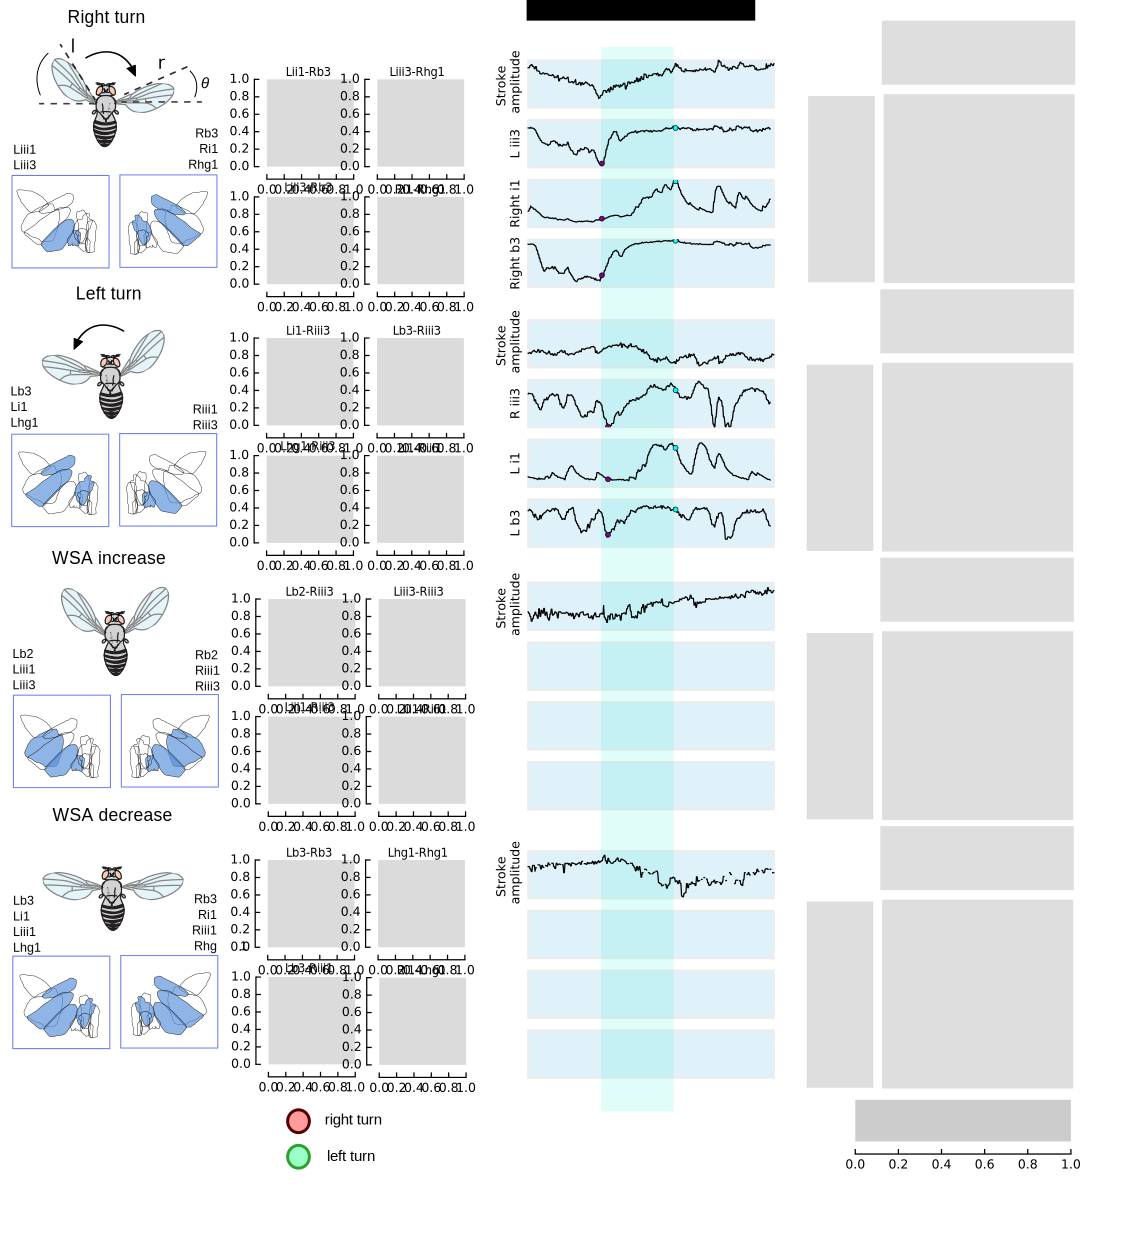

In [70]:
### now do saccade portion to be incorporated in later




from matplotlib.animation import FuncAnimation

import figurefirst as fifi

#layout = fifi.FigureLayout('paper_figure_1_v2.svg',make_mplfigures = True)
layout = fifi.FigureLayout('layouts/paper_figure_4_v5.svg',make_mplfigures = True)

#layout.axes['yaw_left'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['yaw_left'].fill_between(time, (mean_WBA-error), (mean_WBA + error),alpha = 0.1)

#layout.axes['yaw_right'].plot(time, mean_WBA_turn_right) #,'o',alpha = 0.2)
#layout.axes['yaw_right'].fill_between(time, (mean_WBA_turn_right-error_turn_right), (mean_WBA_turn_right + error_turn_right),alpha = 0.1)


fly = flylist[6]
snum = 1  #5

#l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
#r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
#x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
#idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'][snum]


times = np.arange(len(x))*0.02

x = np.rad2deg(x/10.0 *2*np.pi)
x -= np.mean(x[:100])
x += 180
lmr = np.rad2deg((l-r)/10 *2*np.pi)
l_deg = np.rad2deg((l)/10 *2*np.pi)
r_deg = np.rad2deg((r)/10 *2*np.pi)


###check normed signals method 


b1l = normd(fly.normed_signals['left', 'b1'])[idxs]
b1r = normd(fly.normed_signals['right', 'b1'])[idxs]

b2l = normd(fly.normed_signals['left', 'b2'])[idxs]
b2r = normd(fly.normed_signals['right', 'b2'])[idxs]

b3l = normd(fly.normed_signals['left', 'b3'])[idxs]
b3r = normd(fly.normed_signals['right', 'b3'])[idxs]

i1l = normd(fly.normed_signals['left', 'i1'])[idxs]
i1r = normd(fly.normed_signals['right', 'i1'])[idxs]

i2l = normd(fly.normed_signals['left', 'i2'])[idxs]
i2r = normd(fly.normed_signals['right', 'i2'])[idxs]

iii1l = normd(fly.normed_signals['left', 'iii1'])[idxs]
iii1r = normd(fly.normed_signals['right', 'iii1'])[idxs]

iii3l = normd(fly.normed_signals['left', 'iii3'])[idxs]
iii3r = normd(fly.normed_signals['right', 'iii3'])[idxs]

hg1l = normd(fly.normed_signals['left', 'hg1'])[idxs]
hg1r = normd(fly.normed_signals['right', 'hg1'])[idxs]

hg2l = normd(fly.normed_signals['left', 'hg2'])[idxs]
hg2r = normd(fly.normed_signals['right', 'hg2'])[idxs]

hg3l = normd(fly.normed_signals['left', 'hg3'])[idxs]
hg3r = normd(fly.normed_signals['right', 'hg3'])[idxs]

hg4l = normd(fly.normed_signals['left', 'hg4'])[idxs]
hg4r = normd(fly.normed_signals['right', 'hg4'])[idxs]

'''
layout.axes['l_wsa'].plot(times,l_deg,clip_on = False,color = 'k')
layout.axes['l_wsa'].set_xbound(0,times[-1])
layout.axes['l_wsa'].set_ylabel('left \n amplitude')
layout.axes['l_wsa'].patch.set_alpha(0.0)
layout.axes['l_wsa'].set_ybound(20,40)
layout.axes['l_wsa'].set_yticks([20, 30, 40])
#layout.axes['l_wsa'].set_ybound(-15,15)
#layout.axes['l_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)

layout.axes['r_wsa'].plot(times,r_deg,clip_on = False,color = 'k')
layout.axes['r_wsa'].set_xbound(0,times[-1])
layout.axes['r_wsa'].set_ylabel('right \n amplitude')
layout.axes['r_wsa'].patch.set_alpha(0.0)
layout.axes['r_wsa'].set_ybound(20,40)
layout.axes['r_wsa'].set_yticks([20, 30, 40])
#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)

'''

layout.axes['lmr_rt'].plot(times,lmr,clip_on = False,color = 'k')
layout.axes['lmr_rt'].set_xbound(0,times[-1])
layout.axes['lmr_rt'].set_ylabel('Stroke \n amplitude')
layout.axes['lmr_rt'].patch.set_alpha(0.0)
layout.axes['lmr_rt'].set_ybound(-20,20)
layout.axes['lmr_rt'].set_yticks([-15, 0, 15])

layout.axes['liii1_rt'].plot(times,iii3l,clip_on = False,color = 'k')
layout.axes['liii1_rt'].set_xbound(0,times[-1])
layout.axes['liii1_rt'].set_ylabel('L iii3')
layout.axes['liii1_rt'].plot(times[120],iii3l[120],'purple', marker='o', markersize=4)#, 'o') 
layout.axes['liii1_rt'].patch.set_alpha(0.0)
#layout.axes['liii1_rt'].set_ybound(-20,20)
#layout.axes['liii1_rt'].set_yticks([-15, 0, 15])#
#layout.axes['liii1_rt'].plot(times[120],iii3l[120],'purple', marker='o', markersize=4)#, 'o') 
layout.axes['liii1_rt'].plot(times[240],iii3l[240],'cyan', marker='o', markersize=4)#, 'o') 



layout.axes['ri1_rt'].plot(times,i1r,clip_on = False,color = 'k')
layout.axes['ri1_rt'].set_xbound(0,times[-1])
layout.axes['ri1_rt'].set_ylabel('Right i1')
layout.axes['ri1_rt'].patch.set_alpha(0.0)
#layout.axes['ri1_rt'].set_ybound(-20,20)
#layout.axes['ri1_rt'].set_yticks([-15, 0, 15])
layout.axes['ri1_rt'].plot(times[120],i1r[120],'purple', marker='o', markersize=4)#, 'o') 
layout.axes['ri1_rt'].plot(times[240],i1r[240],'cyan', marker='o', markersize=4)#, 'o') 



layout.axes['rb3_rt'].plot(times,b3r,clip_on = False,color = 'k')
layout.axes['rb3_rt'].set_xbound(0,times[-1])
layout.axes['rb3_rt'].set_ylabel('Right b3')
layout.axes['rb3_rt'].patch.set_alpha(0.0)
#layout.axes['ri1_rt'].set_ybound(-20,20)
#layout.axes['ri1_rt'].set_yticks([-15, 0, 15])
layout.axes['rb3_rt'].plot(times[120],b3r[120],'purple', marker='o', markersize=4)#, 'o') 
layout.axes['rb3_rt'].plot(times[240],b3r[240],'cyan', marker='o', markersize=4)#, 'o') 



#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)


##write the clips out here and use the derivative to get the signals 



## plot each segment

#---------------------------------------------------------------------------------------


fly = flylist[6]
snum = 1  #5

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'][snum]
times = np.arange(len(x))*0.02

x = np.rad2deg(x/10.0 *2*np.pi)
x -= np.mean(x[:100])
x += 180
lmr = np.rad2deg((l-r)/10 *2*np.pi)
l_deg = np.rad2deg((l)/10 *2*np.pi)
r_deg = np.rad2deg((r)/10 *2*np.pi)


b1l = normd(fly.normed_signals['left', 'b1'])[idxs]
b1r = normd(fly.normed_signals['right', 'b1'])[idxs]

b2l = normd(fly.normed_signals['left', 'b2'])[idxs]
b2r = normd(fly.normed_signals['right', 'b2'])[idxs]

b3l = normd(fly.normed_signals['left', 'b3'])[idxs]
b3r = normd(fly.normed_signals['right', 'b3'])[idxs]

i1l = normd(fly.normed_signals['left', 'i1'])[idxs]
i1r = normd(fly.normed_signals['right', 'i1'])[idxs]

i2l = normd(fly.normed_signals['left', 'i2'])[idxs]
i2r = normd(fly.normed_signals['right', 'i2'])[idxs]

iii1l = normd(fly.normed_signals['left', 'iii1'])[idxs]
iii1r = normd(fly.normed_signals['right', 'iii1'])[idxs]

iii3l = normd(fly.normed_signals['left', 'iii3'])[idxs]
iii3r = normd(fly.normed_signals['right', 'iii3'])[idxs]

hg1l = normd(fly.normed_signals['left', 'hg1'])[idxs]
hg1r = normd(fly.normed_signals['right', 'hg1'])[idxs]

hg2l = normd(fly.normed_signals['left', 'hg2'])[idxs]
hg2r = normd(fly.normed_signals['right', 'hg2'])[idxs]

hg3l = normd(fly.normed_signals['left', 'hg3'])[idxs]
hg3r = normd(fly.normed_signals['right', 'hg3'])[idxs]

hg4l = normd(fly.normed_signals['left', 'hg4'])[idxs]
hg4r = normd(fly.normed_signals['right', 'hg4'])[idxs]



layout.axes['lmr_lt'].plot(times,lmr,clip_on = False,color = 'k')
layout.axes['lmr_lt'].set_xbound(0,times[-1])
layout.axes['lmr_lt'].set_ylabel('Stroke \n amplitude')
layout.axes['lmr_lt'].patch.set_alpha(0.0)
layout.axes['lmr_lt'].set_ybound(-20,20)
layout.axes['lmr_lt'].set_yticks([-15, 0, 15])
#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)


layout.axes['riii3_lt'].plot(times,iii3r,clip_on = False,color = 'k')
layout.axes['riii3_lt'].set_xbound(0,times[-1])
layout.axes['riii3_lt'].set_ylabel('R iii3')
layout.axes['riii3_lt'].patch.set_alpha(0.0)
layout.axes['riii3_lt'].patch.set_alpha(0.0)
#layout.axes['liii1_rt'].set_ybound(-20,20)
#layout.axes['liii1_rt'].set_yticks([-15, 0, 15])#
layout.axes['riii3_lt'].plot(times[130],iii3r[130],'purple', marker='o', markersize=4)#, 'o') 
layout.axes['riii3_lt'].plot(times[240],iii3r[240],'cyan', marker='o', markersize=4)#, 'o') 


layout.axes['li1_lt'].plot(times,i1l,clip_on = False,color = 'k')
layout.axes['li1_lt'].set_xbound(0,times[-1])
layout.axes['li1_lt'].set_ylabel('L i1')
layout.axes['li1_lt'].patch.set_alpha(0.0)
#layout.axes['ri1_rt'].set_ybound(-20,20)
#layout.axes['ri1_rt'].set_yticks([-15, 0, 15])
layout.axes['li1_lt'].plot(times[130],i1l[130],'purple', marker='o', markersize=4)#, 'o') 
layout.axes['li1_lt'].plot(times[240],i1l[240],'cyan', marker='o', markersize=4)#, 'o') 

layout.axes['lb3_lt'].plot(times,b3l,clip_on = False,color = 'k')
layout.axes['lb3_lt'].set_xbound(0,times[-1])
layout.axes['lb3_lt'].set_ylabel('L b3')
layout.axes['lb3_lt'].patch.set_alpha(0.0)
#layout.axes['ri1_rt'].set_ybound(-20,20)
#layout.axes['ri1_rt'].set_yticks([-15, 0, 15])
layout.axes['lb3_lt'].plot(times[130],b3l[130],'purple', marker='o', markersize=4)#, 'o') 
layout.axes['lb3_lt'].plot(times[240],b3l[240],'cyan', marker='o', markersize=4)#, 'o') 






#---------------------------------------------------------------------------------------




fly = flylist[3]
snum = 1  #5


l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'][snum]


times = np.arange(len(x))*0.02

x = np.rad2deg(x/10.0 *2*np.pi)
x -= np.mean(x[:100])
x += 180
lmr = np.rad2deg((l-r)/10 *2*np.pi)
l_deg = np.rad2deg((l)/10 *2*np.pi)
r_deg = np.rad2deg((r)/10 *2*np.pi)
lpr = np.rad2deg((l+r)/10 *2*np.pi)

layout.axes['lpr_WSAi'].plot(times,lpr,clip_on = False,color = 'k')
layout.axes['lpr_WSAi'].set_xbound(0,times[-1])
layout.axes['lpr_WSAi'].set_ylabel('Stroke \n amplitude')
layout.axes['lpr_WSAi'].patch.set_alpha(0.0)
#layout.axes['lpr_WSAi'].set_ybound(-20,20)
#layout.axes['lpr_WSAi'].set_yticks([-15, 0, 15])
#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)



#---------------------------------------------------------------------------------------

fly = flylist[1]
snum = 1  #5

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'][snum]
times = np.arange(len(x))*0.02

x = np.rad2deg(x/10.0 *2*np.pi)
x -= np.mean(x[:100])
x += 180
lmr = np.rad2deg((l-r)/10 *2*np.pi)
l_deg = np.rad2deg((l)/10 *2*np.pi)
r_deg = np.rad2deg((r)/10 *2*np.pi)
lpr = np.rad2deg((l+r)/10 *2*np.pi)



layout.axes['lpr_WSAd'].plot(times,lpr,clip_on = False,color = 'k')
layout.axes['lpr_WSAd'].set_xbound(0,times[-1])
layout.axes['lpr_WSAd'].set_ylabel('Stroke \n amplitude')
layout.axes['lpr_WSAd'].patch.set_alpha(0.0)
#layout.axes['lpr_WSAd'].set_ybound(-20,20)
#layout.axes['lpr_WSAd'].set_yticks([-15, 0, 15])
#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)




fifi.mpl_functions.set_spines(layout)
layout.save('figure_05_v3.svg')
plt.close('all')
display(SVG('figure_05_v3.svg'))



### cool color scheme 


In [44]:
len(times)

395

In [47]:
times[394]

7.8799999999999999

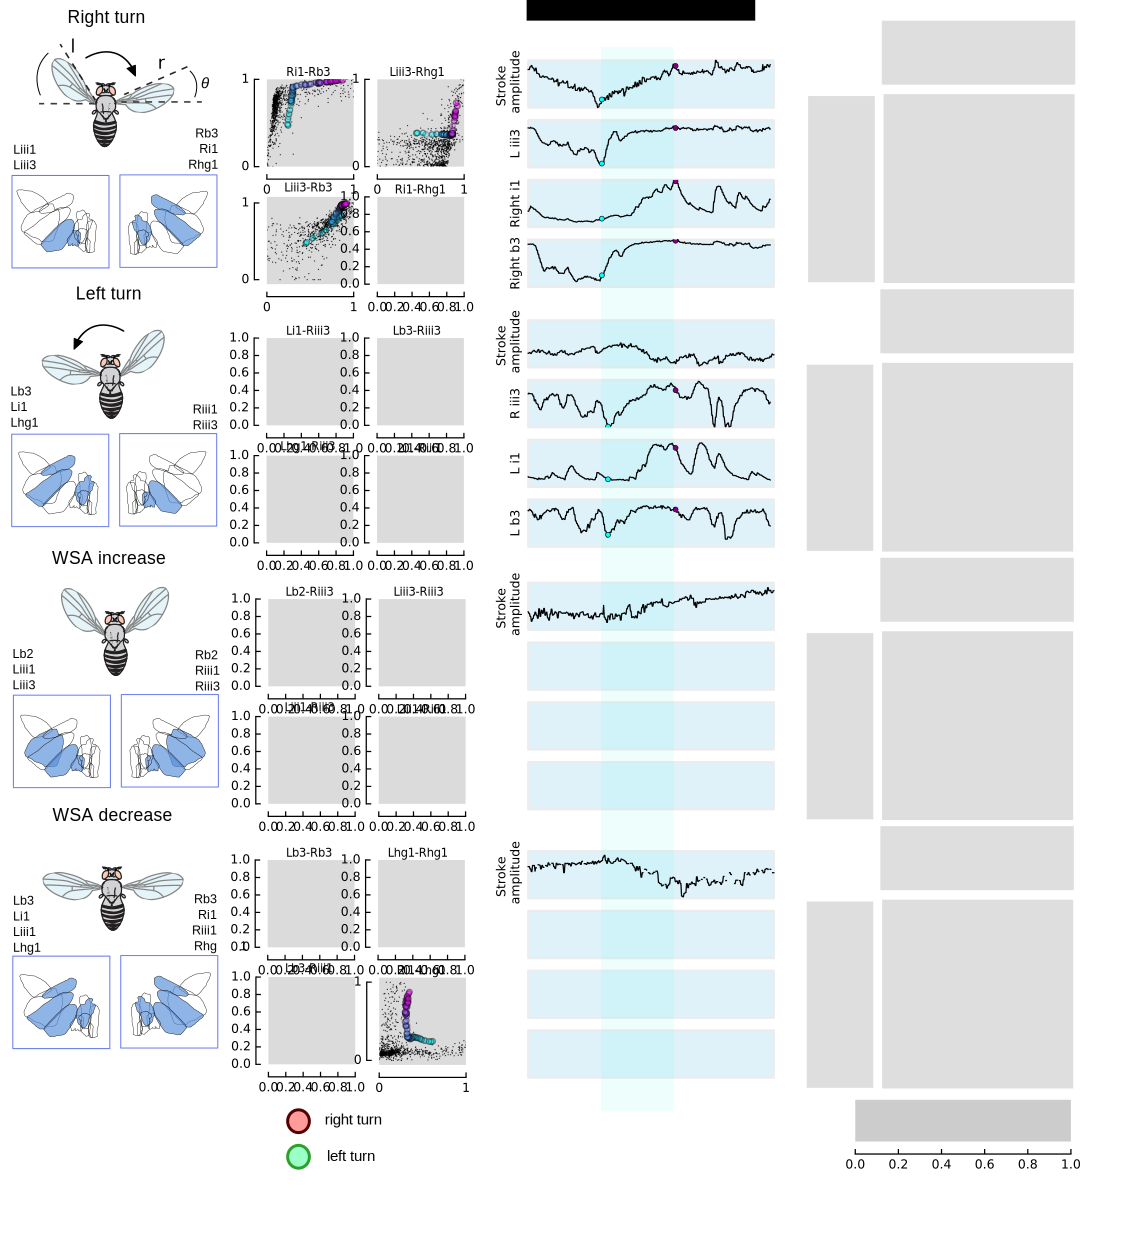

In [121]:
### now do saccade portion to be incorporated in later




from matplotlib.animation import FuncAnimation

import figurefirst as fifi

#layout = fifi.FigureLayout('paper_figure_1_v2.svg',make_mplfigures = True)
layout = fifi.FigureLayout('layouts/paper_figure_4_v5.svg',make_mplfigures = True)

#layout.axes['yaw_left'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['yaw_left'].fill_between(time, (mean_WBA-error), (mean_WBA + error),alpha = 0.1)

#layout.axes['yaw_right'].plot(time, mean_WBA_turn_right) #,'o',alpha = 0.2)
#layout.axes['yaw_right'].fill_between(time, (mean_WBA_turn_right-error_turn_right), (mean_WBA_turn_right + error_turn_right),alpha = 0.1)

import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd






fly = flylist[6]
snum = 1  #5

#l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
#r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
#x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
#idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'][snum]


times = np.arange(len(x))*0.02

x = np.rad2deg(x/10.0 *2*np.pi)
x -= np.mean(x[:100])
x += 180
lmr = np.rad2deg((l-r)/10 *2*np.pi)
l_deg = np.rad2deg((l)/10 *2*np.pi)
r_deg = np.rad2deg((r)/10 *2*np.pi)


###check normed signals method 


b1l = normd(fly.normed_signals['left', 'b1'])[idxs]
b1r = normd(fly.normed_signals['right', 'b1'])[idxs]

b2l = normd(fly.normed_signals['left', 'b2'])[idxs]
b2r = normd(fly.normed_signals['right', 'b2'])[idxs]

b3l = normd(fly.normed_signals['left', 'b3'])[idxs]
b3r = normd(fly.normed_signals['right', 'b3'])[idxs]

i1l = normd(fly.normed_signals['left', 'i1'])[idxs]
i1r = normd(fly.normed_signals['right', 'i1'])[idxs]

i2l = normd(fly.normed_signals['left', 'i2'])[idxs]
i2r = normd(fly.normed_signals['right', 'i2'])[idxs]

iii1l = normd(fly.normed_signals['left', 'iii1'])[idxs]
iii1r = normd(fly.normed_signals['right', 'iii1'])[idxs]

iii3l = normd(fly.normed_signals['left', 'iii3'])[idxs]
iii3r = normd(fly.normed_signals['right', 'iii3'])[idxs]

hg1l = normd(fly.normed_signals['left', 'hg1'])[idxs]
hg1r = normd(fly.normed_signals['right', 'hg1'])[idxs]

hg2l = normd(fly.normed_signals['left', 'hg2'])[idxs]
hg2r = normd(fly.normed_signals['right', 'hg2'])[idxs]

hg3l = normd(fly.normed_signals['left', 'hg3'])[idxs]
hg3r = normd(fly.normed_signals['right', 'hg3'])[idxs]

hg4l = normd(fly.normed_signals['left', 'hg4'])[idxs]
hg4r = normd(fly.normed_signals['right', 'hg4'])[idxs]

'''
layout.axes['l_wsa'].plot(times,l_deg,clip_on = False,color = 'k')
layout.axes['l_wsa'].set_xbound(0,times[-1])
layout.axes['l_wsa'].set_ylabel('left \n amplitude')
layout.axes['l_wsa'].patch.set_alpha(0.0)
layout.axes['l_wsa'].set_ybound(20,40)
layout.axes['l_wsa'].set_yticks([20, 30, 40])
#layout.axes['l_wsa'].set_ybound(-15,15)
#layout.axes['l_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)

layout.axes['r_wsa'].plot(times,r_deg,clip_on = False,color = 'k')
layout.axes['r_wsa'].set_xbound(0,times[-1])
layout.axes['r_wsa'].set_ylabel('right \n amplitude')
layout.axes['r_wsa'].patch.set_alpha(0.0)
layout.axes['r_wsa'].set_ybound(20,40)
layout.axes['r_wsa'].set_yticks([20, 30, 40])
#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)

'''

layout.axes['lmr_rt'].plot(times,lmr,clip_on = False,color = 'k')
layout.axes['lmr_rt'].set_xbound(0,times[-1])
layout.axes['lmr_rt'].set_ylabel('Stroke \n amplitude')
layout.axes['lmr_rt'].patch.set_alpha(0.0)
layout.axes['lmr_rt'].set_ybound(-20,20)
layout.axes['lmr_rt'].set_yticks([-15, 0, 15])
layout.axes['lmr_rt'].plot(times[120],lmr[120],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['lmr_rt'].plot(times[240],lmr[240],'purple', marker='o', markersize=4)#, 'o') 



layout.axes['liii1_rt'].plot(times,iii3l,clip_on = False,color = 'k')
layout.axes['liii1_rt'].set_xbound(0,times[-1])
layout.axes['liii1_rt'].set_ylabel('L iii3')
layout.axes['liii1_rt'].plot(times[120],iii3l[120],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['liii1_rt'].patch.set_alpha(0.0)
#layout.axes['liii1_rt'].set_ybound(-20,20)
#layout.axes['liii1_rt'].set_yticks([-15, 0, 15])#
#layout.axes['liii1_rt'].plot(times[120],iii3l[120],'purple', marker='o', markersize=4)#, 'o') 
layout.axes['liii1_rt'].plot(times[240],iii3l[240],'purple', marker='o', markersize=4)#, 'o') 

#x = list(pitch_down_new_df['muscles'])
c_r = times[120:240]
Min = times[119]
Max = times[241]             
x = i1r[120:240]
y = b3r[120:240]
df= pd.DataFrame({"x":x,"y":y,"c":c_r})
cmap = plt.cm.cool
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

ax1 = layout.axes['Liii1_Rb3']
scatter(flylist[6], ('Ri1'),('Rb3'), ax1)
c = ax1.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
#plot_sector(flylist,('left','iii1'),('right','b3'),'nb-nu',ax3,layout.pathspecs,mode = 'kde',contours = True)
########layout.axes['Liii1_Rb3'].plot(df.x, df.y, color=cmap(norm(df.c.values)), marker = 'o', markersize=2)
#plot_sector(flylist,('left','iii1'),('right','b3'),'lb-nu',ax3,layout.pathspecs,mode = 'kde',contours = True)
layout.axes['Liii1_Rb3'].set_xbound(0,1),layout.axes['Liii1_Rb3'].set_ybound(0,1)#,ax3.set_xlabel('left b3',color = c_l),ax3.set_ylabel('right b3',color = c_r)
layout.axes['Liii1_Rb3'].set_xticks([0,1])
layout.axes['Liii1_Rb3'].set_yticks([0,1])                

x = iii3l[120:240]
y = hg1r[120:240]
ax2 = layout.axes['Liii3_Rhg1']
scatter(flylist[6], ('Liii3'),('Rhg1'), ax2)
c = ax2.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
ax2.set_xbound(0,1),ax2.set_ybound(0,1)
ax2.set_xticks([0,1])
ax2.set_yticks([0,1])                
                
x = iii3l[120:240]
y = b3r[120:240]
ax3 = layout.axes['Liii3_Rb3']
scatter(flylist[6], ('Liii3'),('Rb3'), ax3)
c = ax3.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
ax3.set_xbound(0,1),ax2.set_ybound(0,1)
ax3.set_xticks([0,1])
ax3.set_yticks([0,1])  


x = hg1l[120:240]
y = i1r[120:240]
ax4 = layout.axes['Lhg1_Ri1']
scatter(flylist[6], ('Lhg1'),('Ri1'), ax4)
c = ax4.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
ax4.set_xbound(0,1),ax2.set_ybound(0,1)
ax4.set_xticks([0,1])
ax4.set_yticks([0,1])  



            

layout.axes['ri1_rt'].plot(times,i1r,clip_on = False,color = 'k')
layout.axes['ri1_rt'].set_xbound(0,times[-1])
layout.axes['ri1_rt'].set_ylabel('Right i1')
layout.axes['ri1_rt'].patch.set_alpha(0.0)
#layout.axes['ri1_rt'].set_ybound(-20,20)
#layout.axes['ri1_rt'].set_yticks([-15, 0, 15])
layout.axes['ri1_rt'].plot(times[120],i1r[120],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['ri1_rt'].plot(times[240],i1r[240],'purple', marker='o', markersize=4)#, 'o') 



layout.axes['rb3_rt'].plot(times,b3r,clip_on = False,color = 'k')
layout.axes['rb3_rt'].set_xbound(0,times[-1])
layout.axes['rb3_rt'].set_ylabel('Right b3')
layout.axes['rb3_rt'].patch.set_alpha(0.0)
#layout.axes['ri1_rt'].set_ybound(-20,20)
#layout.axes['ri1_rt'].set_yticks([-15, 0, 15])
layout.axes['rb3_rt'].plot(times[120],b3r[120],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['rb3_rt'].plot(times[240],b3r[240],'purple', marker='o', markersize=4)#, 'o') 



#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)


##write the clips out here and use the derivative to get the signals 



## plot each segment




fly = flylist[6]
snum = 1  #5

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'][snum]
times = np.arange(len(x))*0.02

x = np.rad2deg(x/10.0 *2*np.pi)
x -= np.mean(x[:100])
x += 180
lmr = np.rad2deg((l-r)/10 *2*np.pi)
l_deg = np.rad2deg((l)/10 *2*np.pi)
r_deg = np.rad2deg((r)/10 *2*np.pi)


b1l = normd(fly.normed_signals['left', 'b1'])[idxs]
b1r = normd(fly.normed_signals['right', 'b1'])[idxs]

b2l = normd(fly.normed_signals['left', 'b2'])[idxs]
b2r = normd(fly.normed_signals['right', 'b2'])[idxs]

b3l = normd(fly.normed_signals['left', 'b3'])[idxs]
b3r = normd(fly.normed_signals['right', 'b3'])[idxs]

i1l = normd(fly.normed_signals['left', 'i1'])[idxs]
i1r = normd(fly.normed_signals['right', 'i1'])[idxs]

i2l = normd(fly.normed_signals['left', 'i2'])[idxs]
i2r = normd(fly.normed_signals['right', 'i2'])[idxs]

iii1l = normd(fly.normed_signals['left', 'iii1'])[idxs]
iii1r = normd(fly.normed_signals['right', 'iii1'])[idxs]

iii3l = normd(fly.normed_signals['left', 'iii3'])[idxs]
iii3r = normd(fly.normed_signals['right', 'iii3'])[idxs]

hg1l = normd(fly.normed_signals['left', 'hg1'])[idxs]
hg1r = normd(fly.normed_signals['right', 'hg1'])[idxs]

hg2l = normd(fly.normed_signals['left', 'hg2'])[idxs]
hg2r = normd(fly.normed_signals['right', 'hg2'])[idxs]

hg3l = normd(fly.normed_signals['left', 'hg3'])[idxs]
hg3r = normd(fly.normed_signals['right', 'hg3'])[idxs]

hg4l = normd(fly.normed_signals['left', 'hg4'])[idxs]
hg4r = normd(fly.normed_signals['right', 'hg4'])[idxs]



layout.axes['lmr_lt'].plot(times,lmr,clip_on = False,color = 'k')
layout.axes['lmr_lt'].set_xbound(0,times[-1])
layout.axes['lmr_lt'].set_ylabel('Stroke \n amplitude')
layout.axes['lmr_lt'].patch.set_alpha(0.0)
layout.axes['lmr_lt'].set_ybound(-20,20)
layout.axes['lmr_lt'].set_yticks([-15, 0, 15])
#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)


layout.axes['riii3_lt'].plot(times,iii3r,clip_on = False,color = 'k')
layout.axes['riii3_lt'].set_xbound(0,times[-1])
layout.axes['riii3_lt'].set_ylabel('R iii3')
layout.axes['riii3_lt'].patch.set_alpha(0.0)
layout.axes['riii3_lt'].patch.set_alpha(0.0)
#layout.axes['liii1_rt'].set_ybound(-20,20)
#layout.axes['liii1_rt'].set_yticks([-15, 0, 15])#
layout.axes['riii3_lt'].plot(times[130],iii3r[130],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['riii3_lt'].plot(times[240],iii3r[240],'purple', marker='o', markersize=4)#, 'o') 


layout.axes['li1_lt'].plot(times,i1l,clip_on = False,color = 'k')
layout.axes['li1_lt'].set_xbound(0,times[-1])
layout.axes['li1_lt'].set_ylabel('L i1')
layout.axes['li1_lt'].patch.set_alpha(0.0)
#layout.axes['ri1_rt'].set_ybound(-20,20)
#layout.axes['ri1_rt'].set_yticks([-15, 0, 15])
layout.axes['li1_lt'].plot(times[130],i1l[130],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['li1_lt'].plot(times[240],i1l[240],'purple', marker='o', markersize=4)#, 'o') 

layout.axes['lb3_lt'].plot(times,b3l,clip_on = False,color = 'k')
layout.axes['lb3_lt'].set_xbound(0,times[-1])
layout.axes['lb3_lt'].set_ylabel('L b3')
layout.axes['lb3_lt'].patch.set_alpha(0.0)
#layout.axes['ri1_rt'].set_ybound(-20,20)
#layout.axes['ri1_rt'].set_yticks([-15, 0, 15])
layout.axes['lb3_lt'].plot(times[130],b3l[130],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['lb3_lt'].plot(times[240],b3l[240],'purple', marker='o', markersize=4)#, 'o') 











fly = flylist[3]
snum = 1  #5


l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'][snum]


times = np.arange(len(x))*0.02

x = np.rad2deg(x/10.0 *2*np.pi)
x -= np.mean(x[:100])
x += 180
lmr = np.rad2deg((l-r)/10 *2*np.pi)
l_deg = np.rad2deg((l)/10 *2*np.pi)
r_deg = np.rad2deg((r)/10 *2*np.pi)
lpr = np.rad2deg((l+r)/10 *2*np.pi)

layout.axes['lpr_WSAi'].plot(times,lpr,clip_on = False,color = 'k')
layout.axes['lpr_WSAi'].set_xbound(0,times[-1])
layout.axes['lpr_WSAi'].set_ylabel('Stroke \n amplitude')
layout.axes['lpr_WSAi'].patch.set_alpha(0.0)
#layout.axes['lpr_WSAi'].set_ybound(-20,20)
#layout.axes['lpr_WSAi'].set_yticks([-15, 0, 15])
#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)



fly = flylist[1]
snum = 1  #5

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'][snum]
times = np.arange(len(x))*0.02

x = np.rad2deg(x/10.0 *2*np.pi)
x -= np.mean(x[:100])
x += 180
lmr = np.rad2deg((l-r)/10 *2*np.pi)
l_deg = np.rad2deg((l)/10 *2*np.pi)
r_deg = np.rad2deg((r)/10 *2*np.pi)
lpr = np.rad2deg((l+r)/10 *2*np.pi)



layout.axes['lpr_WSAd'].plot(times,lpr,clip_on = False,color = 'k')
layout.axes['lpr_WSAd'].set_xbound(0,times[-1])
layout.axes['lpr_WSAd'].set_ylabel('Stroke \n amplitude')
layout.axes['lpr_WSAd'].patch.set_alpha(0.0)
#layout.axes['lpr_WSAd'].set_ybound(-20,20)
#layout.axes['lpr_WSAd'].set_yticks([-15, 0, 15])
#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)




fifi.mpl_functions.set_spines(layout)
layout.save('figure_05_v4.svg')
plt.close('all')
display(SVG('figure_05_v4.svg'))





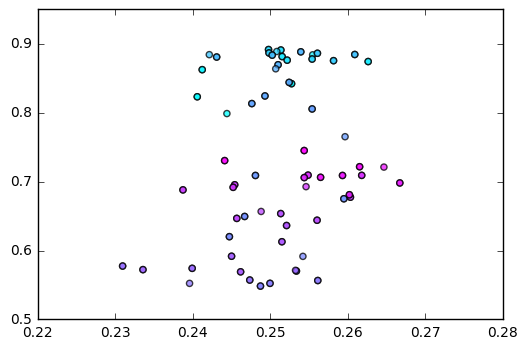

In [108]:
### cool color scheme 

import numpy as np
import matplotlib.pyplot as plt


x = iii1l[120:240]
y = b3r[120:240]
colors = times[120:240]
fig = plt.figure()
ax = fig.add_subplot(111)
c = ax.scatter(x, y, c=colors, cmap='cool', alpha=0.75)


'''
c_r = times[120:240]
Min = times[119]
Max = times[241]             
x = iii1l[120:240]
y = b3r[120:240]

df= pd.DataFrame({"x":x,"y":y,"c":c_r})
cmap = plt.cm.cool
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

print(len(x))

print(len(y))

print(len(c_r))

'''


#plt.plot(df.x, df.y, color=cmap(norm(df.c.values)), marker = 'o', markersize=2)
plt.show()

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in power


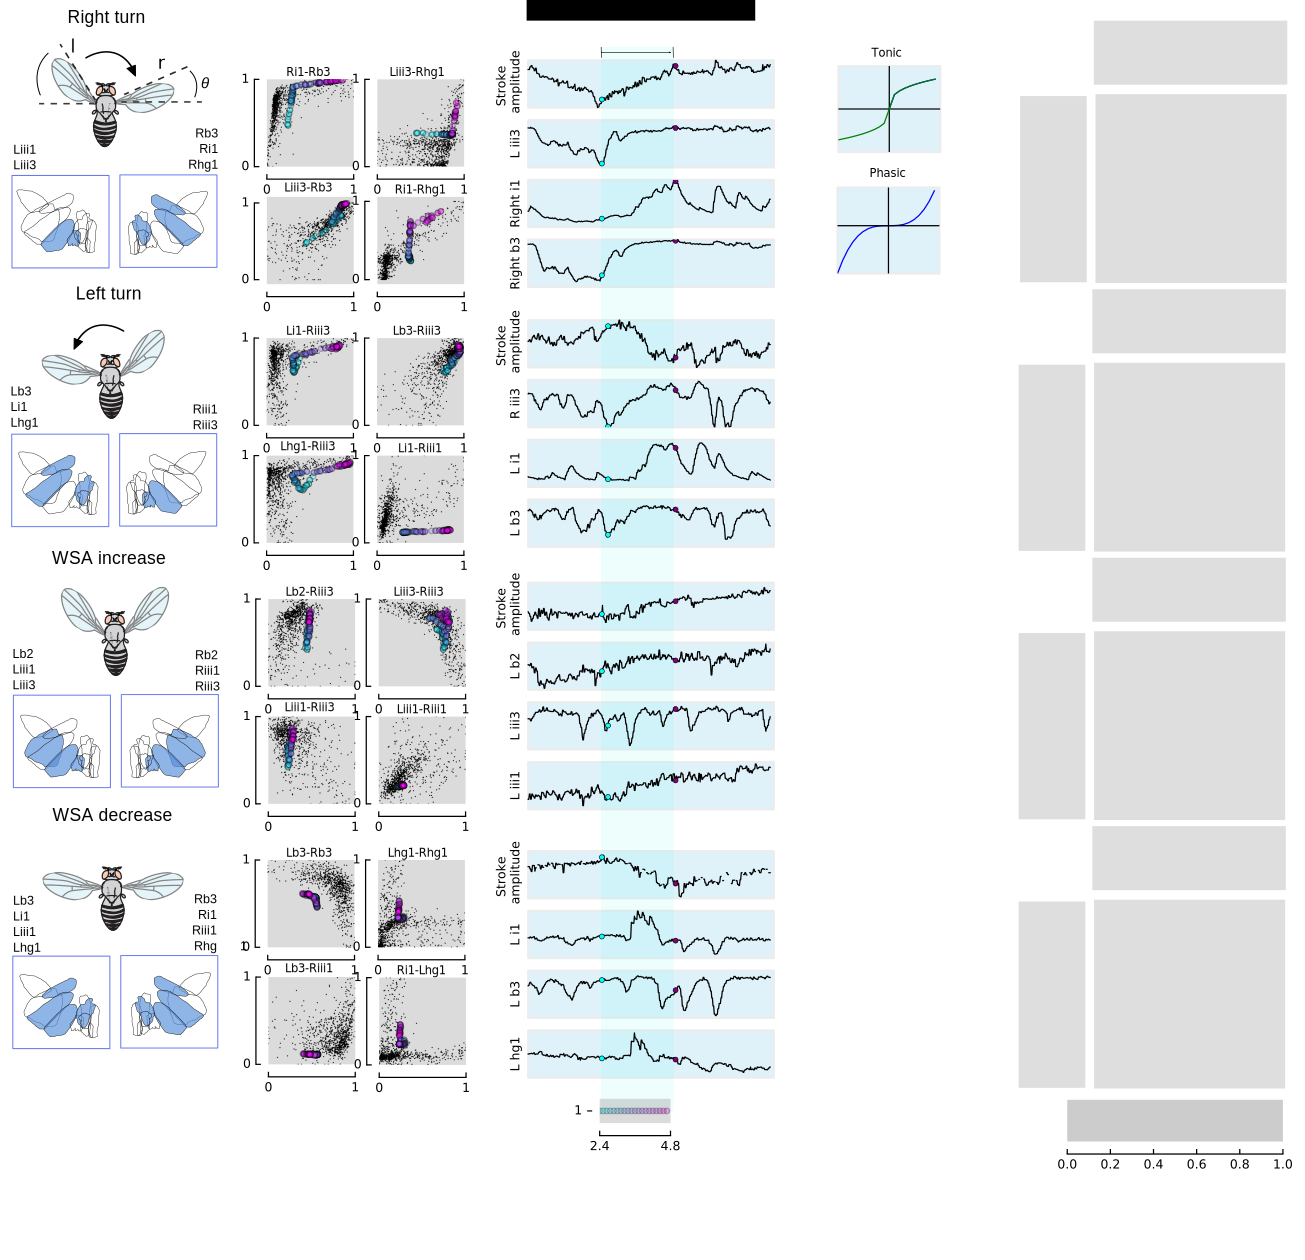

In [172]:
### now do saccade portion to be incorporated in later




from matplotlib.animation import FuncAnimation

import figurefirst as fifi

#layout = fifi.FigureLayout('paper_figure_1_v2.svg',make_mplfigures = True)
layout = fifi.FigureLayout('layouts/paper_figure_4_v6.svg',make_mplfigures = True)

#layout.axes['yaw_left'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['yaw_left'].fill_between(time, (mean_WBA-error), (mean_WBA + error),alpha = 0.1)

#layout.axes['yaw_right'].plot(time, mean_WBA_turn_right) #,'o',alpha = 0.2)
#layout.axes['yaw_right'].fill_between(time, (mean_WBA_turn_right-error_turn_right), (mean_WBA_turn_right + error_turn_right),alpha = 0.1)

import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd


colors = times[120:240]

x = np.arange(-10,10)
layout.axes['phasic'].plot(x, x**3)
layout.axes['tonic'].plot(x, x** (1. / 3))
layout.axes['phasic'].set_xbound(-10, 10)
layout.axes['tonic'].set_xbound(-10, 10)
layout.axes['tonic'].axhline(y=0, color='k')
layout.axes['tonic'].axvline(x=0, color='k')
layout.axes['phasic'].axhline(y=0, color='k')
layout.axes['phasic'].axvline(x=0, color='k')
#layout.axes['phasic'].set_ybound(-10, 10)
layout.axes['tonic'].set_ybound([-3, 3])
layout.axes['tonic'].plot(x, np.cbrt(x))




fly = flylist[6]
snum = 1  #5

#l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
#r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
#x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
#idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'][snum]


times = np.arange(len(x))*0.02

x = np.rad2deg(x/10.0 *2*np.pi)
x -= np.mean(x[:100])
x += 180
lmr = np.rad2deg((l-r)/10 *2*np.pi)
l_deg = np.rad2deg((l)/10 *2*np.pi)
r_deg = np.rad2deg((r)/10 *2*np.pi)


###check normed signals method 


b1l = normd(fly.normed_signals['left', 'b1'])[idxs]
b1r = normd(fly.normed_signals['right', 'b1'])[idxs]

b2l = normd(fly.normed_signals['left', 'b2'])[idxs]
b2r = normd(fly.normed_signals['right', 'b2'])[idxs]

b3l = normd(fly.normed_signals['left', 'b3'])[idxs]
b3r = normd(fly.normed_signals['right', 'b3'])[idxs]

i1l = normd(fly.normed_signals['left', 'i1'])[idxs]
i1r = normd(fly.normed_signals['right', 'i1'])[idxs]

i2l = normd(fly.normed_signals['left', 'i2'])[idxs]
i2r = normd(fly.normed_signals['right', 'i2'])[idxs]

iii1l = normd(fly.normed_signals['left', 'iii1'])[idxs]
iii1r = normd(fly.normed_signals['right', 'iii1'])[idxs]

iii3l = normd(fly.normed_signals['left', 'iii3'])[idxs]
iii3r = normd(fly.normed_signals['right', 'iii3'])[idxs]

hg1l = normd(fly.normed_signals['left', 'hg1'])[idxs]
hg1r = normd(fly.normed_signals['right', 'hg1'])[idxs]

hg2l = normd(fly.normed_signals['left', 'hg2'])[idxs]
hg2r = normd(fly.normed_signals['right', 'hg2'])[idxs]

hg3l = normd(fly.normed_signals['left', 'hg3'])[idxs]
hg3r = normd(fly.normed_signals['right', 'hg3'])[idxs]

hg4l = normd(fly.normed_signals['left', 'hg4'])[idxs]
hg4r = normd(fly.normed_signals['right', 'hg4'])[idxs]

'''
layout.axes['l_wsa'].plot(times,l_deg,clip_on = False,color = 'k')
layout.axes['l_wsa'].set_xbound(0,times[-1])
layout.axes['l_wsa'].set_ylabel('left \n amplitude')
layout.axes['l_wsa'].patch.set_alpha(0.0)
layout.axes['l_wsa'].set_ybound(20,40)
layout.axes['l_wsa'].set_yticks([20, 30, 40])
#layout.axes['l_wsa'].set_ybound(-15,15)
#layout.axes['l_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)

layout.axes['r_wsa'].plot(times,r_deg,clip_on = False,color = 'k')
layout.axes['r_wsa'].set_xbound(0,times[-1])
layout.axes['r_wsa'].set_ylabel('right \n amplitude')
layout.axes['r_wsa'].patch.set_alpha(0.0)
layout.axes['r_wsa'].set_ybound(20,40)
layout.axes['r_wsa'].set_yticks([20, 30, 40])
#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)

'''

layout.axes['lmr_rt'].plot(times,lmr,clip_on = False,color = 'k')
layout.axes['lmr_rt'].set_xbound(0,times[-1])
layout.axes['lmr_rt'].set_ylabel('Stroke \n amplitude')
layout.axes['lmr_rt'].patch.set_alpha(0.0)
layout.axes['lmr_rt'].set_ybound(-20,20)
layout.axes['lmr_rt'].set_yticks([-15, 0, 15])
layout.axes['lmr_rt'].plot(times[120],lmr[120],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['lmr_rt'].plot(times[240],lmr[240],'purple', marker='o', markersize=4)#, 'o') 



layout.axes['liii1_rt'].plot(times,iii3l,clip_on = False,color = 'k')
layout.axes['liii1_rt'].set_xbound(0,times[-1])
layout.axes['liii1_rt'].set_ylabel('L iii3')
layout.axes['liii1_rt'].plot(times[120],iii3l[120],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['liii1_rt'].patch.set_alpha(0.0)
#layout.axes['liii1_rt'].set_ybound(-20,20)
#layout.axes['liii1_rt'].set_yticks([-15, 0, 15])#
#layout.axes['liii1_rt'].plot(times[120],iii3l[120],'purple', marker='o', markersize=4)#, 'o') 
layout.axes['liii1_rt'].plot(times[240],iii3l[240],'purple', marker='o', markersize=4)#, 'o') 

#x = list(pitch_down_new_df['muscles'])
c_r = times[120:240]
Min = times[119]
Max = times[241]             
x = i1r[120:240]
y = b3r[120:240]
df= pd.DataFrame({"x":x,"y":y,"c":c_r})
cmap = plt.cm.cool
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

ax1 = layout.axes['Liii1_Rb3']
scatter(flylist[6], ('Ri1'),('Rb3'), ax1)
c = ax1.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
#plot_sector(flylist,('left','iii1'),('right','b3'),'nb-nu',ax3,layout.pathspecs,mode = 'kde',contours = True)
########layout.axes['Liii1_Rb3'].plot(df.x, df.y, color=cmap(norm(df.c.values)), marker = 'o', markersize=2)
#plot_sector(flylist,('left','iii1'),('right','b3'),'lb-nu',ax3,layout.pathspecs,mode = 'kde',contours = True)
layout.axes['Liii1_Rb3'].set_xbound(0,1),layout.axes['Liii1_Rb3'].set_ybound(0,1)#,ax3.set_xlabel('left b3',color = c_l),ax3.set_ylabel('right b3',color = c_r)
layout.axes['Liii1_Rb3'].set_xticks([0,1])
layout.axes['Liii1_Rb3'].set_yticks([0,1])                

x = iii3l[120:240]
y = hg1r[120:240]
ax2 = layout.axes['Liii3_Rhg1']
scatter(flylist[6], ('Liii3'),('Rhg1'), ax2)
c = ax2.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
ax2.set_xbound(0,1),ax2.set_ybound(0,1)
ax2.set_xticks([0,1])
ax2.set_yticks([0,1])                
                
x = iii3l[120:240]
y = b3r[120:240]
ax3 = layout.axes['Liii3_Rb3']
scatter(flylist[6], ('Liii3'),('Rb3'), ax3)
c = ax3.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
ax3.set_xbound(0,1),ax2.set_ybound(0,1)
ax3.set_xticks([0,1])
ax3.set_yticks([0,1])  


x = hg1r[120:240]
y = i1r[120:240]
ax4 = layout.axes['Ri1_Rhg1']
scatter(flylist[6], ('Ri1'),('Rhg1'), ax4)
c = ax4.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
ax4.set_xbound(0,1),ax2.set_ybound(0,1)
ax4.set_xticks([0,1])
ax4.set_yticks([0,1])  



            

layout.axes['ri1_rt'].plot(times,i1r,clip_on = False,color = 'k')
layout.axes['ri1_rt'].set_xbound(0,times[-1])
layout.axes['ri1_rt'].set_ylabel('Right i1')
layout.axes['ri1_rt'].patch.set_alpha(0.0)
#layout.axes['ri1_rt'].set_ybound(-20,20)
#layout.axes['ri1_rt'].set_yticks([-15, 0, 15])
layout.axes['ri1_rt'].plot(times[120],i1r[120],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['ri1_rt'].plot(times[240],i1r[240],'purple', marker='o', markersize=4)#, 'o') 



layout.axes['rb3_rt'].plot(times,b3r,clip_on = False,color = 'k')
layout.axes['rb3_rt'].set_xbound(0,times[-1])
layout.axes['rb3_rt'].set_ylabel('Right b3')
layout.axes['rb3_rt'].patch.set_alpha(0.0)
#layout.axes['ri1_rt'].set_ybound(-20,20)
#layout.axes['ri1_rt'].set_yticks([-15, 0, 15])
layout.axes['rb3_rt'].plot(times[120],b3r[120],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['rb3_rt'].plot(times[240],b3r[240],'purple', marker='o', markersize=4)#, 'o') 



#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)


##write the clips out here and use the derivative to get the signals 



## plot each segment

#----------------------------------------------------------------------


fly = flylist[6]
snum = 1  #5

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'][snum]
times = np.arange(len(x))*0.02

x = np.rad2deg(x/10.0 *2*np.pi)
x -= np.mean(x[:100])
x += 180
lmr = np.rad2deg((l-r)/10 *2*np.pi)
l_deg = np.rad2deg((l)/10 *2*np.pi)
r_deg = np.rad2deg((r)/10 *2*np.pi)


b1l = normd(fly.normed_signals['left', 'b1'])[idxs]
b1r = normd(fly.normed_signals['right', 'b1'])[idxs]

b2l = normd(fly.normed_signals['left', 'b2'])[idxs]
b2r = normd(fly.normed_signals['right', 'b2'])[idxs]

b3l = normd(fly.normed_signals['left', 'b3'])[idxs]
b3r = normd(fly.normed_signals['right', 'b3'])[idxs]

i1l = normd(fly.normed_signals['left', 'i1'])[idxs]
i1r = normd(fly.normed_signals['right', 'i1'])[idxs]

i2l = normd(fly.normed_signals['left', 'i2'])[idxs]
i2r = normd(fly.normed_signals['right', 'i2'])[idxs]

iii1l = normd(fly.normed_signals['left', 'iii1'])[idxs]
iii1r = normd(fly.normed_signals['right', 'iii1'])[idxs]

iii3l = normd(fly.normed_signals['left', 'iii3'])[idxs]
iii3r = normd(fly.normed_signals['right', 'iii3'])[idxs]

hg1l = normd(fly.normed_signals['left', 'hg1'])[idxs]
hg1r = normd(fly.normed_signals['right', 'hg1'])[idxs]

hg2l = normd(fly.normed_signals['left', 'hg2'])[idxs]
hg2r = normd(fly.normed_signals['right', 'hg2'])[idxs]

hg3l = normd(fly.normed_signals['left', 'hg3'])[idxs]
hg3r = normd(fly.normed_signals['right', 'hg3'])[idxs]

hg4l = normd(fly.normed_signals['left', 'hg4'])[idxs]
hg4r = normd(fly.normed_signals['right', 'hg4'])[idxs]



layout.axes['lmr_lt'].plot(times,lmr,clip_on = False,color = 'k')
layout.axes['lmr_lt'].set_xbound(0,times[-1])
layout.axes['lmr_lt'].set_ylabel('Stroke \n amplitude')
layout.axes['lmr_lt'].patch.set_alpha(0.0)
layout.axes['lmr_lt'].set_ybound(-20,20)
layout.axes['lmr_lt'].set_yticks([-15, 0, 15])
#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)
layout.axes['lmr_lt'].plot(times[130],lmr[130],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['lmr_lt'].plot(times[240],lmr[240],'purple', marker='o', markersize=4)#, 'o') 


x = i1l[120:240]
y = iii3r[120:240]
ax5 = layout.axes['Li1_Riii3']
scatter(flylist[6], ('Li1'),('Riii3'), ax5)
c = ax5.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
ax5.set_xbound(0,1),ax5.set_ybound(0,1)
ax5.set_xticks([0,1])
ax5.set_yticks([0,1])                
                


x = b3l[120:240]
y = iii3r[120:240]
ax6 = layout.axes['Lb3_Riii3']
scatter(flylist[6], ('Lb3'),('Riii3'), ax6)
c = ax6.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
ax6.set_xbound(0,1),ax6.set_ybound(0,1)
ax6.set_xticks([0,1])
ax6.set_yticks([0,1])                
                               
                
x = hg1l[120:240]
y = iii3r[120:240]
ax7 = layout.axes['Lhg1_Riii3']
scatter(flylist[6], ('Lhg1'),('Riii3'), ax7)
c = ax7.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
ax7.set_xbound(0,1),ax7.set_ybound(0,1)
ax7.set_xticks([0,1])
ax7.set_yticks([0,1])  


x = i1l[120:240]
y = iii1r[120:240]
ax8 = layout.axes['Li1_Riii1']
scatter(flylist[6], ('Li1'),('Riii1'), ax8)
c = ax8.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
ax8.set_xbound(0,1),ax8.set_ybound(0,1)
ax8.set_xticks([0,1])
ax8.set_yticks([0,1])  



layout.axes['riii3_lt'].plot(times,iii3r,clip_on = False,color = 'k')
layout.axes['riii3_lt'].set_xbound(0,times[-1])
layout.axes['riii3_lt'].set_ylabel('R iii3')
layout.axes['riii3_lt'].patch.set_alpha(0.0)
layout.axes['riii3_lt'].patch.set_alpha(0.0)
#layout.axes['liii1_rt'].set_ybound(-20,20)
#layout.axes['liii1_rt'].set_yticks([-15, 0, 15])#
layout.axes['riii3_lt'].plot(times[130],iii3r[130],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['riii3_lt'].plot(times[240],iii3r[240],'purple', marker='o', markersize=4)#, 'o') 


layout.axes['li1_lt'].plot(times,i1l,clip_on = False,color = 'k')
layout.axes['li1_lt'].set_xbound(0,times[-1])
layout.axes['li1_lt'].set_ylabel('L i1')
layout.axes['li1_lt'].patch.set_alpha(0.0)
#layout.axes['ri1_rt'].set_ybound(-20,20)
#layout.axes['ri1_rt'].set_yticks([-15, 0, 15])
layout.axes['li1_lt'].plot(times[130],i1l[130],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['li1_lt'].plot(times[240],i1l[240],'purple', marker='o', markersize=4)#, 'o') 

layout.axes['lb3_lt'].plot(times,b3l,clip_on = False,color = 'k')
layout.axes['lb3_lt'].set_xbound(0,times[-1])
layout.axes['lb3_lt'].set_ylabel('L b3')
layout.axes['lb3_lt'].patch.set_alpha(0.0)
#layout.axes['ri1_rt'].set_ybound(-20,20)
#layout.axes['ri1_rt'].set_yticks([-15, 0, 15])
layout.axes['lb3_lt'].plot(times[130],b3l[130],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['lb3_lt'].plot(times[240],b3l[240],'purple', marker='o', markersize=4)#, 'o') 





#____________________________________________________________________





fly = flylist[3]
snum = 1  #5


l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'][snum]


b1l = normd(fly.normed_signals['left', 'b1'])[idxs]
b1r = normd(fly.normed_signals['right', 'b1'])[idxs]

b2l = normd(fly.normed_signals['left', 'b2'])[idxs]
b2r = normd(fly.normed_signals['right', 'b2'])[idxs]

b3l = normd(fly.normed_signals['left', 'b3'])[idxs]
b3r = normd(fly.normed_signals['right', 'b3'])[idxs]

i1l = normd(fly.normed_signals['left', 'i1'])[idxs]
i1r = normd(fly.normed_signals['right', 'i1'])[idxs]

i2l = normd(fly.normed_signals['left', 'i2'])[idxs]
i2r = normd(fly.normed_signals['right', 'i2'])[idxs]

iii1l = normd(fly.normed_signals['left', 'iii1'])[idxs]
iii1r = normd(fly.normed_signals['right', 'iii1'])[idxs]

iii3l = normd(fly.normed_signals['left', 'iii3'])[idxs]
iii3r = normd(fly.normed_signals['right', 'iii3'])[idxs]

hg1l = normd(fly.normed_signals['left', 'hg1'])[idxs]
hg1r = normd(fly.normed_signals['right', 'hg1'])[idxs]

hg2l = normd(fly.normed_signals['left', 'hg2'])[idxs]
hg2r = normd(fly.normed_signals['right', 'hg2'])[idxs]

hg3l = normd(fly.normed_signals['left', 'hg3'])[idxs]
hg3r = normd(fly.normed_signals['right', 'hg3'])[idxs]

hg4l = normd(fly.normed_signals['left', 'hg4'])[idxs]
hg4r = normd(fly.normed_signals['right', 'hg4'])[idxs]

times = np.arange(len(x))*0.02

x = np.rad2deg(x/10.0 *2*np.pi)
x -= np.mean(x[:100])
x += 180
lmr = np.rad2deg((l-r)/10 *2*np.pi)
l_deg = np.rad2deg((l)/10 *2*np.pi)
r_deg = np.rad2deg((r)/10 *2*np.pi)
lpr = np.rad2deg((l+r)/10 *2*np.pi)

layout.axes['lpr_WSAi'].plot(times,lpr,clip_on = False,color = 'k')
layout.axes['lpr_WSAi'].set_xbound(0,times[-1])
layout.axes['lpr_WSAi'].set_ylabel('Stroke \n amplitude')
layout.axes['lpr_WSAi'].patch.set_alpha(0.0)
#layout.axes['lpr_WSAi'].set_ybound(-20,20)
#layout.axes['lpr_WSAi'].set_yticks([-15, 0, 15])
#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)
layout.axes['lpr_WSAi'].plot(times[120],lpr[120],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['lpr_WSAi'].plot(times[240],lpr[240],'purple', marker='o', markersize=4)#, 'o') 




x = b2l[120:240]
y = iii3r[120:240]
ax9 = layout.axes['Lb2_Riii3']
scatter(flylist[6], ('Lb2'),('Riii3'), ax9)
c = ax9.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
ax9.set_xbound(0,1),ax9.set_ybound(0,1)
ax9.set_xticks([0,1])
ax9.set_yticks([0,1])                
                


x = iii3l[120:240]
y = iii3r[120:240]
ax10 = layout.axes['Liii3_Riii3']
scatter(flylist[6], ('Liii3'),('Riii3'), ax10)
c = ax10.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
ax10.set_xbound(0,1),ax10.set_ybound(0,1)
ax10.set_xticks([0,1])
ax10.set_yticks([0,1])                
                               
                
x = iii1l[120:240]
y = iii3r[120:240]
ax11 = layout.axes['Liii1_Riii3']
scatter(flylist[6], ('Liii1'),('Riii3'), ax11)
c = ax11.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
ax11.set_xbound(0,1),ax11.set_ybound(0,1)
ax11.set_xticks([0,1])
ax11.set_yticks([0,1])  


x = iii1l[120:240]
y = iii1r[120:240]
ax12 = layout.axes['Liii1_Riii1']
scatter(flylist[6], ('Liii1'),('Riii1'), ax12)
c = ax12.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
ax12.set_xbound(0,1),ax12.set_ybound(0,1)
ax12.set_xticks([0,1])
ax12.set_yticks([0,1])  



layout.axes['lb2_WSAi'].plot(times,b2l,clip_on = False,color = 'k')
layout.axes['lb2_WSAi'].set_xbound(0,times[-1])
layout.axes['lb2_WSAi'].set_ylabel('L b2')
layout.axes['lb2_WSAi'].patch.set_alpha(0.0)
layout.axes['lb2_WSAi'].patch.set_alpha(0.0)
#layout.axes['liii1_rt'].set_ybound(-20,20)
#layout.axes['liii1_rt'].set_yticks([-15, 0, 15])#
layout.axes['lb2_WSAi'].plot(times[120],b2l[120],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['lb2_WSAi'].plot(times[240],b2l[240],'purple', marker='o', markersize=4)#, 'o') 


layout.axes['liii3_WSAi'].plot(times,iii3l,clip_on = False,color = 'k')
layout.axes['liii3_WSAi'].set_xbound(0,times[-1])
layout.axes['liii3_WSAi'].set_ylabel('L iii3')
layout.axes['liii3_WSAi'].patch.set_alpha(0.0)
#layout.axes['ri1_rt'].set_ybound(-20,20)
#layout.axes['ri1_rt'].set_yticks([-15, 0, 15])
layout.axes['liii3_WSAi'].plot(times[130],iii3l[130],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['liii3_WSAi'].plot(times[240],iii3l[240],'purple', marker='o', markersize=4)#, 'o') 

layout.axes['liii1_WSAi'].plot(times,iii1l,clip_on = False,color = 'k')
layout.axes['liii1_WSAi'].set_xbound(0,times[-1])
layout.axes['liii1_WSAi'].set_ylabel('L iii1')
layout.axes['liii1_WSAi'].patch.set_alpha(0.0)
#layout.axes['ri1_rt'].set_ybound(-20,20)
#layout.axes['ri1_rt'].set_yticks([-15, 0, 15])
layout.axes['liii1_WSAi'].plot(times[130],iii1l[130],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['liii1_WSAi'].plot(times[240],iii1l[240],'purple', marker='o', markersize=4)#, 'o') 









#____________________________________________________________________________

fly = flylist[1]
snum = 1  #5

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'][snum]
times = np.arange(len(x))*0.02

x = np.rad2deg(x/10.0 *2*np.pi)
x -= np.mean(x[:100])
x += 180
lmr = np.rad2deg((l-r)/10 *2*np.pi)
l_deg = np.rad2deg((l)/10 *2*np.pi)
r_deg = np.rad2deg((r)/10 *2*np.pi)
lpr = np.rad2deg((l+r)/10 *2*np.pi)

b1l = normd(fly.normed_signals['left', 'b1'])[idxs]
b1r = normd(fly.normed_signals['right', 'b1'])[idxs]

b2l = normd(fly.normed_signals['left', 'b2'])[idxs]
b2r = normd(fly.normed_signals['right', 'b2'])[idxs]

b3l = normd(fly.normed_signals['left', 'b3'])[idxs]
b3r = normd(fly.normed_signals['right', 'b3'])[idxs]

i1l = normd(fly.normed_signals['left', 'i1'])[idxs]
i1r = normd(fly.normed_signals['right', 'i1'])[idxs]

i2l = normd(fly.normed_signals['left', 'i2'])[idxs]
i2r = normd(fly.normed_signals['right', 'i2'])[idxs]

iii1l = normd(fly.normed_signals['left', 'iii1'])[idxs]
iii1r = normd(fly.normed_signals['right', 'iii1'])[idxs]

iii3l = normd(fly.normed_signals['left', 'iii3'])[idxs]
iii3r = normd(fly.normed_signals['right', 'iii3'])[idxs]

hg1l = normd(fly.normed_signals['left', 'hg1'])[idxs]
hg1r = normd(fly.normed_signals['right', 'hg1'])[idxs]

hg2l = normd(fly.normed_signals['left', 'hg2'])[idxs]
hg2r = normd(fly.normed_signals['right', 'hg2'])[idxs]

hg3l = normd(fly.normed_signals['left', 'hg3'])[idxs]
hg3r = normd(fly.normed_signals['right', 'hg3'])[idxs]

hg4l = normd(fly.normed_signals['left', 'hg4'])[idxs]
hg4r = normd(fly.normed_signals['right', 'hg4'])[idxs]


layout.axes['lpr_WSAd'].plot(times,lpr,clip_on = False,color = 'k')
layout.axes['lpr_WSAd'].set_xbound(0,times[-1])
layout.axes['lpr_WSAd'].set_ylabel('Stroke \n amplitude')
layout.axes['lpr_WSAd'].patch.set_alpha(0.0)
#layout.axes['lpr_WSAd'].set_ybound(-20,20)
#layout.axes['lpr_WSAd'].set_yticks([-15, 0, 15])
#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)
layout.axes['lpr_WSAd'].plot(times[120],lpr[120],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['lpr_WSAd'].plot(times[240],lpr[240],'purple', marker='o', markersize=4)#, 'o') 




x = b3l[120:240]
y = b3r[120:240]
ax13 = layout.axes['Lb3_Rb3']
scatter(flylist[6], ('Lb3'),('Rb3'), ax13)
c = ax13.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
ax13.set_xbound(0,1),ax13.set_ybound(0,1)
ax13.set_xticks([0,1])
ax13.set_yticks([0,1])                
                


x = hg1l[120:240]
y = hg1r[120:240]
ax14 = layout.axes['Lhg1_Rhg1']
scatter(flylist[6], ('Lhg1'),('Rhg1'), ax14)
c = ax14.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
ax14.set_xbound(0,1),ax14.set_ybound(0,1)
ax14.set_xticks([0,1])
ax14.set_yticks([0,1])                
                               
                
x = b3l[120:240]
y = iii1r[120:240]
ax15 = layout.axes['Lb3_Riii1']
scatter(flylist[6], ('Lb3'),('Riii1'), ax15)
c = ax15.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
ax15.set_xbound(0,1),ax15.set_ybound(0,1)
ax15.set_xticks([0,1])
ax15.set_yticks([0,1])  


x = hg1l[120:240]
y = i1r[120:240]
ax16 = layout.axes['Lhg1_Ri1']
scatter(flylist[6], ('Lhg1'),('Ri1'), ax16)
c = ax16.scatter(x, y, c=colors, cmap='cool', alpha=0.25)
ax16.set_xbound(0,1),ax16.set_ybound(0,1)
ax16.set_xticks([0,1])
ax16.set_yticks([0,1])  


x = times[120:240]
y = np.ones(20)
ax17 = layout.axes['cmap_legend']
x_prime = x[::6]
colors = x_prime
c = ax17.scatter(x_prime, y, c=colors, cmap='cool', alpha=0.25)
ax17.set_xbound(times[120],times[240]),ax17.set_ybound(0.8,1.2)
ax17.set_xticks([times[120],times[240]])
ax17.set_yticks([1])  



layout.axes['li1_WSAd'].plot(times,i1l,clip_on = False,color = 'k')
layout.axes['li1_WSAd'].set_xbound(0,times[-1])
layout.axes['li1_WSAd'].set_ylabel('L i1')
layout.axes['li1_WSAd'].patch.set_alpha(0.0)
layout.axes['li1_WSAd'].patch.set_alpha(0.0)
#layout.axes['liii1_rt'].set_ybound(-20,20)
#layout.axes['liii1_rt'].set_yticks([-15, 0, 15])#
layout.axes['li1_WSAd'].plot(times[120],i1l[120],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['li1_WSAd'].plot(times[240],i1l[240],'purple', marker='o', markersize=4)#, 'o') 


layout.axes['lb3_WSAd'].plot(times,b3l,clip_on = False,color = 'k')
layout.axes['lb3_WSAd'].set_xbound(0,times[-1])
layout.axes['lb3_WSAd'].set_ylabel('L b3')
layout.axes['lb3_WSAd'].patch.set_alpha(0.0)
#layout.axes['ri1_rt'].set_ybound(-20,20)
#layout.axes['ri1_rt'].set_yticks([-15, 0, 15])
layout.axes['lb3_WSAd'].plot(times[120],b3l[120],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['lb3_WSAd'].plot(times[240],b3l[240],'purple', marker='o', markersize=4)#, 'o') 

layout.axes['lhg1_WSAd'].plot(times,hg1l,clip_on = False,color = 'k')
layout.axes['lhg1_WSAd'].set_xbound(0,times[-1])
layout.axes['lhg1_WSAd'].set_ylabel('L hg1')
layout.axes['lhg1_WSAd'].patch.set_alpha(0.0)
#layout.axes['ri1_rt'].set_ybound(-20,20)
#layout.axes['ri1_rt'].set_yticks([-15, 0, 15])
layout.axes['lhg1_WSAd'].plot(times[120],hg1l[120],'cyan', marker='o', markersize=4)#, 'o') 
layout.axes['lhg1_WSAd'].plot(times[240],hg1l[240],'purple', marker='o', markersize=4)#, 'o') 









fifi.mpl_functions.set_spines(layout)
layout.save('figure_05_v6.svg')
plt.close('all')
display(SVG('figure_05_v6.svg'))


